<a href="https://colab.research.google.com/github/JuhiNayak/Machine-Learning/blob/master/Distilation_Location.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distilation : Location

# Import Libraries

In [ ]:
import requests
import urllib.request
import pandas as pd
import csv
from csv import writer
from csv import reader
from bs4 import BeautifulSoup
!pip install us   #for US states abbreviations
import us
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

     |████████████████████████████████| 133kB 3.9MB/s 
  Created wheel for us: filename=us-2.0.2-cp36-none-any.whl size=11928 sha256=8d187e0f56330bdc5c4f200cc6a2818d03573b29c1d74a7102059435af71a520
  Stored in directory: /root/.cache/pip/wheels/e2/16/45/6453383ffa495670f0f6b80a3e697a9771d98cfbaf8b451e73
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp36-cp36m-linux_x86_64.whl size=74759 sha256=0773629f211b70677fde75f3d01e89508e78ff3353dd54e558c3132541fd8e71
  Stored in directory: /root/.cache/pip/wheels/9c/6f/33/92bb9a4b4562a60ba6a80cedbab8907e48bc7a8b1f369ea0ae
Successfully built us jellyfish


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', -1)
from sklearn import preprocessing
import seaborn as seabornInstance 
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
%matplotlib inline
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [ ]:
!pip install xgboost

In [ ]:
!pip install mlxtend --upgrade

     |████████████████████████████████| 1.3MB 2.9MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
!pip install scikit-optimize

     |████████████████████████████████| 102kB 2.3MB/s 


In [ ]:
# Modified from ...
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import time
import pickle
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.calibration import calibration_curve
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns; sns.set()
from skopt import BayesSearchCV
import mlxtend.evaluate
from mlxtend.evaluate import bias_variance_decomp
CV_N_REPEATS = 20
BINS = 10


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls ./drive/My\ Drive/the-feature-finders/datasets/loan-prediction

Mounted at /content/drive
BankLoanApprovalFinalDataset1.csv	SPSS_loan_roc.sav
BankLoanApprovalFinalDataset.csv	test_Y3wMUE5_7gLdaTN.csv
BankLoanApprovalFinalMergedDataset.csv	train_u6lujuX_CVtuZ9i.csv
lending-club				usStatesWithMostDebtAbbr.csv
LoanPredictionProblemDescription.xlsx


# Beautiful Soup

Our project topic is Bank Loan Approval system, We have alreday performed feature transformation, data amalgamation by merging two datasets from different sources. We already have features: Loan Amount, Loan Amount Term, debt-to-income ratio, Loan Staus, Address State, Employeed or not, Credit History.

So by using beautiful soup we are scraping a website. This website contains the list of US states ranked with the most debt.

We are performing data enrichment by scraping the ranking based on the US State into our dataset.

## Download the URL which we want scrape

In [ ]:
page = requests.get("https://www.worldatlas.com/articles/us-states-with-the-most-debt.html")
page

<Response [200]>

In [ ]:
page.status_code

200

In [ ]:
page.content

b'\n\n\n\n\n<!DOCTYPE html>\n<html lang="en-US">\n    <head>\n        <meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/>\n        <meta name="viewport" content="user-scalable=yes, initial-scale=1.0, width=device-width"/>\n\n                    <link rel="canonical" href="https://www.worldatlas.com/articles/us-states-with-the-most-debt.html"/>\n        \n                    <meta name="description" content="California carries the most debt out of any state, followed by New York and Massachusetts.">\n        \n        \n        \n        <link rel="icon" href="/nwa_assets/img/site/favicon.png" type="image/x-icon">\n\n                                <link rel="amphtml" href="https://www.worldatlas.com/amp/articles/us-states-with-the-most-debt.html">\n            <title>US States With the Most Debt - WorldAtlas</title>\n\n                    <meta property="og:title" content="US States With the Most Debt"/>\n                    <meta property="og:type" content="article"/>

## Parsing a page with BeautifulSoup

In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="user-scalable=yes, initial-scale=1.0, width=device-width" name="viewport"/>
  <link href="https://www.worldatlas.com/articles/us-states-with-the-most-debt.html" rel="canonical"/>
  <meta content="California carries the most debt out of any state, followed by New York and Massachusetts." name="description"/>
  <link href="/nwa_assets/img/site/favicon.png" rel="icon" type="image/x-icon"/>
  <link href="https://www.worldatlas.com/amp/articles/us-states-with-the-most-debt.html" rel="amphtml"/>
  <title>
   US States With the Most Debt - WorldAtlas
  </title>
  <meta content="US States With the Most Debt" property="og:title">
   <meta content="article" property="og:type"/>
   <meta content="https://www.worldatlas.com/r/w2000-h1125-q90/upload/92/ee/89/shutterstock-1223596246.jpg" property="og:image"/>
   <meta content="2000" property="og:image:width:"/>
   <meta

In [ ]:
list(soup.children)

['\n', 'html', '\n', <html lang="en-US">
 <head>
 <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 <meta content="user-scalable=yes, initial-scale=1.0, width=device-width" name="viewport"/>
 <link href="https://www.worldatlas.com/articles/us-states-with-the-most-debt.html" rel="canonical"/>
 <meta content="California carries the most debt out of any state, followed by New York and Massachusetts." name="description"/>
 <link href="/nwa_assets/img/site/favicon.png" rel="icon" type="image/x-icon"/>
 <link href="https://www.worldatlas.com/amp/articles/us-states-with-the-most-debt.html" rel="amphtml"/>
 <title>US States With the Most Debt - WorldAtlas</title>
 <meta content="US States With the Most Debt" property="og:title">
 <meta content="article" property="og:type"/>
 <meta content="https://www.worldatlas.com/r/w2000-h1125-q90/upload/92/ee/89/shutterstock-1223596246.jpg" property="og:image"/>
 <meta content="2000" property="og:image:width:"/>
 <meta content="1125" pr

##  Extract the table

In [ ]:
table = soup.find(id="article_table")
print(table.prettify())

<div class="mod_excess excess_show_desktop" id="article_table">
 <table data-role="table">
  <thead>
   <tr>
    <th>
     Rank
    </th>
    <th>
     ﻿State
    </th>
    <th>
     Debt Total (Billions)
    </th>
   </tr>
  </thead>
  <tbody>
   <tr>
    <td>
     1
    </td>
    <td>
     California
    </td>
    <td>
     $152.80
    </td>
   </tr>
   <tr>
    <td>
     2
    </td>
    <td>
     New York
    </td>
    <td>
     $139.20
    </td>
   </tr>
   <tr>
    <td>
     3
    </td>
    <td>
     Massachusetts
    </td>
    <td>
     $77.00
    </td>
   </tr>
   <tr>
    <td>
     4
    </td>
    <td>
     New Jersey
    </td>
    <td>
     $65.90
    </td>
   </tr>
   <tr>
    <td>
     5
    </td>
    <td>
     Illinois
    </td>
    <td>
     $61.80
    </td>
   </tr>
   <tr>
    <td>
     6
    </td>
    <td>
     Texas
    </td>
    <td>
     $51.00
    </td>
   </tr>
   <tr>
    <td>
     7
    </td>
    <td>
     Pennsylvania
    </td>
    <td>
     $47.50
    </td>
   

## Finding all instances of a tr tag at once

In [ ]:
tr = table.findAll(['tr'])
print(tr)

[<tr><th>Rank</th><th>﻿State </th><th>Debt Total (Billions)</th></tr>, <tr><td>1</td><td>California</td><td>$152.80 </td></tr>, <tr><td>2</td><td>New York</td><td>$139.20 </td></tr>, <tr><td>3</td><td>Massachusetts</td><td>$77.00 </td></tr>, <tr><td>4</td><td>New Jersey</td><td>$65.90 </td></tr>, <tr><td>5</td><td>Illinois</td><td>$61.80 </td></tr>, <tr><td>6</td><td>Texas</td><td>$51.00 </td></tr>, <tr><td>7</td><td>Pennsylvania</td><td>$47.50 </td></tr>, <tr><td>8</td><td>Connecticut</td><td>$38.80 </td></tr>, <tr><td>9</td><td>Michigan</td><td>$33.50 </td></tr>, <tr><td>10</td><td>Ohio</td><td>$33.50 </td></tr>, <tr><td>11</td><td>Washington</td><td>$33.40 </td></tr>, <tr><td>12</td><td>Florida</td><td>$28.80 </td></tr>, <tr><td>13</td><td>Maryland</td><td>$28.00 </td></tr>, <tr><td>14</td><td>Virginia</td><td>$27.80 </td></tr>, <tr><td>15</td><td>Wisconsin</td><td>$23.30 </td></tr>, <tr><td>16</td><td>Indiana</td><td>$21.80 </td></tr>, <tr><td>17</td><td>Missouri</td><td>$18.40 </t

## Store the data in the csv format

In [ ]:
csvFile = open("usStatesWithMostDebt.csv",'wt',newline='',encoding='utf-8')
writer = csv.writer(csvFile)  
try:   
        for cell in tr:
            th = cell.find_all('th')
            th_data = [col.text.strip('\n') for col in th]
            td = cell.find_all('td')
            row = [i.text.replace('\n','') for i in td]
            writer.writerow(th_data+row)      
        
finally:   
    csvFile.close()

In [ ]:
datadf = pd.read_csv("usStatesWithMostDebt.csv")
datadf

,Rank,﻿State,Debt Total (Billions)
0,1,California,$152.80
1,2,New York,$139.20
2,3,Massachusetts,$77.00
3,4,New Jersey,$65.90
4,5,Illinois,$61.80
5,6,Texas,$51.00
6,7,Pennsylvania,$47.50
7,8,Connecticut,$38.80
8,9,Michigan,$33.50
9,10,Ohio,$33.50


## Adding US states abbreviations column in the csv

In [ ]:
#testing the imported library
state = us.states.lookup('Maryland')
state.abbr

'MD'

In [ ]:
# Open the input_file in read mode and output_file in write mode
with open('usStatesWithMostDebt.csv', 'r') as read_obj, \
        open('usStatesWithMostDebtAbbr.csv', 'w', newline='') as write_obj:
    # Create a csv.reader object from the input file object
    csv_reader = reader(read_obj)
    # Create a csv.writer object from the output file object
    csv_writer = csv.writer(write_obj)
    # Read each row of the input csv file as list
    for row in csv_reader:
        #print(row)
        if row[1] == '\ufeffState ':
          state_abbr = 'addr_state'
        else:
          #print(row[1])
          state = us.states.lookup(row[1])
          print(state)
          state_abbr = state.abbr
          print(state_abbr)
        row.append(state_abbr)
        csv_writer.writerow(row)


California
CA
New York
NY
Massachusetts
MA
New Jersey
NJ
Illinois
IL
Texas
TX
Pennsylvania
PA
Connecticut
CT
Michigan
MI
Ohio
OH
Washington
WA
Florida
FL
Maryland
MD
Virginia
VA
Wisconsin
WI
Indiana
IN
Missouri
MO
Louisiana
LA
Colorado
CO
Minnesota
MN
North Carolina
NC
South Carolina
SC
Kentucky
KY
Arizona
AZ
Georgia
GA
Oregon
OR
Hawaii
HI
Rhode Island
RI
Alabama
AL
Oklahoma
OK
New Hampshire
NH
Kansas
KS
Mississippi
MS
Utah
UT
West Virginia
WV
New Mexico
NM
Iowa
IA
Tennessee
TN
Alaska
AK
Arkansas
AR
Maine
ME
Delaware
DE
South Dakota
SD
Vermont
VT
Idaho
ID
Nevada
NV
North Dakota
ND
Montana
MT
Nebraska
NE
Wyoming
WY


In [ ]:
datadf1 = pd.read_csv("usStatesWithMostDebtAbbr.csv")
datadf1

,Rank,﻿State,Debt Total (Billions),addr_state
0,1,California,$152.80,CA
1,2,New York,$139.20,NY
2,3,Massachusetts,$77.00,MA
3,4,New Jersey,$65.90,NJ
4,5,Illinois,$61.80,IL
5,6,Texas,$51.00,TX
6,7,Pennsylvania,$47.50,PA
7,8,Connecticut,$38.80,CT
8,9,Michigan,$33.50,MI
9,10,Ohio,$33.50,OH


## Data Load and Enrichment
Adding the scrape data into final dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls ./drive/My\ Drive/the-feature-finders/datasets/loan-prediction

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
BankLoanApprovalFinalDataset1.csv	SPSS_loan_roc.sav
BankLoanApprovalFinalDataset.csv	test_Y3wMUE5_7gLdaTN.csv
BankLoanApprovalFinalMergedDataset.csv	train_u6lujuX_CVtuZ9i.csv
lending-club				usStatesWithMostDebtAbbr.csv
LoanPredictionProblemDescription.xlsx


In [ ]:
# Take the latest data for year 2018

path = '/content/drive/My Drive/the-feature-finders/datasets/loan-prediction/lending-club/accepted_2007_to_2018Q4.csv.gz'
data = pd.read_csv(path,parse_dates=['issue_d'], infer_datetime_format=True,low_memory=False)
data = data[(data.issue_d >= '2018-01-01 00:00:00') & (data.issue_d < '2019-01-01 00:00:00')]
data = data.reset_index(drop=True)

data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,130954621,NaN,5000.0,5000.0,5000.0,36 months,20.39,186.82,D,D4,General Manager,8 years,RENT,50000.0,Verified,2018-03-01,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=130954621,NaN,other,Other,740xx,OK,21.80,1.0,Jan-2009,665.0,669.0,0.0,9.0,NaN,5.0,0.0,116.0,23.2,18.0,w,3780.31,3780.31,...,33430.0,19344.0,500.0,27820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,130964697,NaN,15000.0,15000.0,15000.0,36 months,9.92,483.45,B,B2,IT Director,2 years,OWN,196000.0,Source Verified,2018-03-01,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=130964697,NaN,debt_consolidation,Debt consolidation,337xx,FL,18.29,0.0,Jul-1998,700.0,704.0,0.0,65.0,NaN,19.0,0.0,24243.0,46.3,53.0,w,10878.50,10878.50,...,605228.0,137713.0,28500.0,147178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,130955326,NaN,11200.0,11200.0,11200.0,60 months,30.79,367.82,G,G1,Client services,< 1 year,RENT,44000.0,Not Verified,2018-03-01,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=130955326,NaN,medical,Medical expenses,030xx,NH,43.97,1.0,Jul-2007,665.0,669.0,2.0,6.0,NaN,8.0,0.0,1526.0,24.6,14.0,w,10193.73,10193.73,...,80367.0,67173.0,1900.0,74167.0,7101.0,610.0,614.0,Feb-2005,3.0,1.0,14.0,80.0,11.0,8.0,0.0,2.0,37.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,130504052,NaN,25000.0,25000.0,25000.0,60 months,21.85,688.35,D,D5,Asphalt Supervisor,10+ years,MORTGAGE,65000.0,Source Verified,2018-03-01,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=130504052,NaN,debt_consolidation,Debt consolidation,361xx,AL,12.89,1.0,Mar-1995,665.0,669.0,1.0,22.0,NaN,7.0,0.0,8657.0,98.4,16.0,w,22188.73,22188.73,...,101234.0,17039.0,3300.0,10220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,130956066,NaN,3000.0,3000.0,3000.0,36 months,7.34,93.10,A,A4,Scale Technician,9 years,RENT,52000.0,Source Verified,2018-03-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=130956066,NaN,major_purchase,Major purchase,988xx,WA,0.58,0.0,Jan-1998,760.0,764.0,0.0,26.0,NaN,7.0,0.0,141.0,0.5,30.0,w,0.00,0.00,...,191216.0,141.0,30500.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Choose required columns. Create a new dataframe with only required number of columns
df = data[['purpose','annual_inc','loan_amnt','term','loan_status','home_ownership','emp_length','dti','addr_state','issue_d']]
df.head(5)

,purpose,annual_inc,loan_amnt,term,loan_status,home_ownership,emp_length,dti,addr_state,issue_d
0,other,50000.0,5000.0,36 months,Current,RENT,8 years,21.80,OK,2018-03-01
1,debt_consolidation,196000.0,15000.0,36 months,Current,OWN,2 years,18.29,FL,2018-03-01
2,medical,44000.0,11200.0,60 months,Current,RENT,< 1 year,43.97,NH,2018-03-01
3,debt_consolidation,65000.0,25000.0,60 months,Current,MORTGAGE,10+ years,12.89,AL,2018-03-01
4,major_purchase,52000.0,3000.0,36 months,Fully Paid,RENT,9 years,0.58,WA,2018-03-01


In [ ]:
df = pd.merge(df, datadf1, on="addr_state",how="left")
df.head(5)

,purpose,annual_inc,loan_amnt,term,loan_status,home_ownership,emp_length,dti,addr_state,issue_d,Rank,﻿State,Debt Total (Billions)
0,other,50000.0,5000.0,36 months,Current,RENT,8 years,21.80,OK,2018-03-01,30.0,Oklahoma,$8.50
1,debt_consolidation,196000.0,15000.0,36 months,Current,OWN,2 years,18.29,FL,2018-03-01,12.0,Florida,$28.80
2,medical,44000.0,11200.0,60 months,Current,RENT,< 1 year,43.97,NH,2018-03-01,31.0,New Hampshire,$7.70
3,debt_consolidation,65000.0,25000.0,60 months,Current,MORTGAGE,10+ years,12.89,AL,2018-03-01,29.0,Alabama,$8.80
4,major_purchase,52000.0,3000.0,36 months,Fully Paid,RENT,9 years,0.58,WA,2018-03-01,11.0,Washington,$33.40


In [ ]:
df.dropna(subset=['Rank'], inplace=True)

In [ ]:
df = df[['purpose','annual_inc','loan_amnt','term','loan_status','home_ownership','emp_length','dti','addr_state','Rank']]

## Data Cleaning

In [ ]:
df.head(5)

,purpose,annual_inc,loan_amnt,term,loan_status,home_ownership,emp_length,dti,addr_state,Rank
0,other,50000.0,5000.0,36 months,Current,RENT,8 years,21.80,OK,30.0
1,debt_consolidation,196000.0,15000.0,36 months,Current,OWN,2 years,18.29,FL,12.0
2,medical,44000.0,11200.0,60 months,Current,RENT,< 1 year,43.97,NH,31.0
3,debt_consolidation,65000.0,25000.0,60 months,Current,MORTGAGE,10+ years,12.89,AL,29.0
4,major_purchase,52000.0,3000.0,36 months,Fully Paid,RENT,9 years,0.58,WA,11.0


In [ ]:
df.isnull().sum()

purpose           0    
annual_inc        0    
loan_amnt         0    
term              0    
loan_status       0    
home_ownership    0    
emp_length        41940
dti               1132 
addr_state        0    
Rank              0    
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494259 entries, 0 to 495241
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   purpose         494259 non-null  object 
 1   annual_inc      494259 non-null  float64
 2   loan_amnt       494259 non-null  float64
 3   term            494259 non-null  object 
 4   loan_status     494259 non-null  object 
 5   home_ownership  494259 non-null  object 
 6   emp_length      452319 non-null  object 
 7   dti             493127 non-null  float64
 8   addr_state      494259 non-null  object 
 9   Rank            494259 non-null  float64
dtypes: float64(4), object(6)
memory usage: 41.5+ MB


In [ ]:
df.dropna(subset=['emp_length','dti'], inplace=True)

In [ ]:
print(df.loan_status.value_counts())

# Remove the 'Current' loan status values
df = df[df.loan_status != 'Current']
print(df.loan_status.value_counts())

Current               390462
Fully Paid            43585 
Charged Off           7672  
Late (31-120 days)    6467  
In Grace Period       2649  
Late (16-30 days)     1398  
Default               7     
Name: loan_status, dtype: int64
Fully Paid            43585
Charged Off           7672 
Late (31-120 days)    6467 
In Grace Period       2649 
Late (16-30 days)     1398 
Default               7    
Name: loan_status, dtype: int64


Considering 'Fully Paid' as Loan_status = approved and for rest other categories Loan_status = not approved




In [ ]:
default=['Charged Off','Late (31-120 days)','In Grace Period','Late (16-30 days)','Default']
df['loan_status']=df['loan_status'].apply(lambda x: 'Default' if x in default else x)

In [ ]:
df['loan_status'] = df['loan_status'].replace({'Fully Paid':1,'Default':0})

In [ ]:
df.loan_status.value_counts()

1    43585
0    18193
Name: loan_status, dtype: int64

In [ ]:
# Remove string characters in 'term' column and convert to numeric
df['term'] = df['term'].str.replace(r'\D', '')
df['term'] = df['term'].astype(int)

Adding a new column 'Employed' to check whether the applicant is employed or not. We have calculated this based on emp_length.

Considering < 1 year of employee length as non-employed and > 1 years as employee

In [ ]:
def employee_emp_length(x):
    if x=='< 1 year':
        return 0
    else:
        return 1
    
df['Employed']=df['emp_length'].apply(employee_emp_length)

In [ ]:
# Remove string characters in 'emp_length' column and convert to numeric
# df_LendingClub['emp_length'] = df_LendingClub['emp_length'].str.replace(r'\D', '')
# df_LendingClub['emp_length'] = df_LendingClub['emp_length'].astype(int)

# drop emp_length column
df.drop(['emp_length'],axis=1,inplace=True)

In [ ]:
df.head(15)

,purpose,annual_inc,loan_amnt,term,loan_status,home_ownership,dti,addr_state,Rank,Employed
4,major_purchase,52000.0,3000.0,36,1,RENT,0.58,WA,11.0,1
16,other,55000.0,5000.0,36,1,OWN,14.18,GA,25.0,1
23,home_improvement,40000.0,7000.0,36,1,MORTGAGE,20.25,TX,6.0,0
24,credit_card,55000.0,20300.0,60,0,RENT,26.63,NY,2.0,0
38,debt_consolidation,57000.0,30000.0,36,1,OWN,27.58,FL,12.0,1
40,house,85000.0,21000.0,60,1,OWN,15.76,NY,2.0,1
42,debt_consolidation,150000.0,40000.0,60,1,MORTGAGE,4.09,NY,2.0,1
50,credit_card,36610.0,5000.0,36,1,RENT,13.85,NJ,4.0,1
68,home_improvement,86000.0,15000.0,36,1,MORTGAGE,9.66,CA,1.0,1
71,debt_consolidation,38000.0,12000.0,36,1,RENT,21.45,CA,1.0,1


## Calculate Accuracy Rate

In [ ]:
df_state = df.groupby(by=["addr_state","purpose"]).agg(
    total = ('loan_status', 'count'),
    total_approved = ('loan_status', 'sum')
)
df_state.head(50)

total  total_approved
addr_state purpose                                  
AK         car                 1      1             
           credit_card         28     15            
           debt_consolidation  54     39            
           home_improvement    14     10            
           house               2      2             
           major_purchase      2      1             
           medical             5      3             
           moving              1      0             
           other               10     7             
AL         car                 6      4             
           credit_card         127    88            
           debt_consolidation  396    252           
           home_improvement    54     40            
           house               19     13            
           major_purchase      21     16            
           medical             14     11            
           moving              2      0             
           other               74     59            
           renewable_energy    1      1             
           small_business      7      6             
           vacation            6      4             
AR         car                 6      5             
           credit_card         76     57            
           debt_consolidation  220    138           
           home_improvement    25     12            
           house               4      3             
           major_purchase      17     12            
           medical             11     9             
           moving              5      2             
           other               39     24            
           small_business      9      4             
           vacation            2      2             
AZ         car                 23     19            
           credit_card         350    241           
           debt_consolidation  843    620           
           home_improvement    118    90            
           house               26     19            
           major_purchase      47     38            
           medical             33     24            
           moving              16     14            
           other               137    98            
           small_business      10     6             
           vacation            12     11            
CA         car                 123    94            
           credit_card         1844   1326          
           debt_consolidation  4649   3221          
           home_improvement    671    508           
           house               123    80            
           major_purchase      308    198           
           medical             166    95

In [ ]:
df_state["Approval_Rate"] = (df_state.total_approved/df_state.total)*100

In [ ]:
df_state.head(50) # over purpose

total  total_approved  Approval_Rate
addr_state purpose                                                 
AK         car                 1      1               100.000000   
           credit_card         28     15              53.571429    
           debt_consolidation  54     39              72.222222    
           home_improvement    14     10              71.428571    
           house               2      2               100.000000   
           major_purchase      2      1               50.000000    
           medical             5      3               60.000000    
           moving              1      0               0.000000     
           other               10     7               70.000000    
AL         car                 6      4               66.666667    
           credit_card         127    88              69.291339    
           debt_consolidation  396    252             63.636364    
           home_improvement    54     40              74.074074    
           house               19     13              68.421053    
           major_purchase      21     16              76.190476    
           medical             14     11              78.571429    
           moving              2      0               0.000000     
           other               74     59              79.729730    
           renewable_energy    1      1               100.000000   
           small_business      7      6               85.714286    
           vacation            6      4               66.666667    
AR         car                 6      5               83.333333    
           credit_card         76     57              75.000000    
           debt_consolidation  220    138             62.727273    
           home_improvement    25     12              48.000000    
           house               4      3               75.000000    
           major_purchase      17     12              70.588235    
           medical             11     9               81.818182    
           moving              5      2               40.000000    
           other               39     24              61.538462    
           small_business      9      4               44.444444    
           vacation            2      2               100.000000   
AZ         car                 23     19              82.608696    
           credit_card         350    241             68.857143    
           debt_consolidation  843    620             73.546856    
           home_improvement    118    90              76.271186    
           house               26     19              73.076923    
           major_purchase      47     38              80.851064    
           medical             33     24              72.727273    
           moving              16     14              87.500000    
           other               137    98              71.532847    
           small_business      10     6               60.000000    
           vacation            12     11              91.666667    
CA         car                 123    94              76.422764    
           credit_card         1844   1326            71.908894    
           debt_consolidation  4649   3221            69.283717    
           home_improvement    671    508             75.707899    
           house               123    80              65.040650    
           major_purchase      308    198             64.285714    
           medical             166    95              57.228916

In [ ]:
df_state.tail(50)

total  total_approved  Approval_Rate
addr_state purpose                                                 
VT         debt_consolidation  69     61              88.405797    
           home_improvement    5      3               60.000000    
           house               1      1               100.000000   
           moving              2      2               100.000000   
           other               10     9               90.000000    
           small_business      1      0               0.000000     
WA         car                 15     15              100.000000   
           credit_card         272    217             79.779412    
           debt_consolidation  755    594             78.675497    
           home_improvement    100    84              84.000000    
           house               26     22              84.615385    
           major_purchase      37     31              83.783784    
           medical             22     15              68.181818    
           moving              17     11              64.705882    
           other               136    98              72.058824    
           renewable_energy    2      2               100.000000   
           small_business      16     13              81.250000    
           vacation            10     10              100.000000   
WI         car                 11     10              90.909091    
           credit_card         184    131             71.195652    
           debt_consolidation  423    286             67.612293    
           home_improvement    58     42              72.413793    
           house               13     10              76.923077    
           major_purchase      18     15              83.333333    
           medical             24     17              70.833333    
           moving              4      3               75.000000    
           other               66     42              63.636364    
           renewable_energy    2      1               50.000000    
           small_business      5      2               40.000000    
           vacation            2      2               100.000000   
WV         credit_card         57     47              82.456140    
           debt_consolidation  157    127             80.891720    
           home_improvement    18     14              77.777778    
           house               4      4               100.000000   
           major_purchase      3      3               100.000000   
           medical             3      2               66.666667    
           moving              1      1               100.000000   
           other               18     17              94.444444    
           small_business      3      2               66.666667    
WY         car                 2      2               100.000000   
           credit_card         25     21              84.000000    
           debt_consolidation  50     38              76.000000    
           home_improvement    8      6               75.000000    
           house               4      4               100.000000   
           major_purchase      2      1               50.000000    
           medical             2      2               100.000000   
           moving              2      1               50.000000    
           other               6      6               100.000000   
           small_business      2      2               100.000000   
           vacation            1      1               100.000000

In [ ]:
state_set = set()
for entry in df_state.index:
    state_set.add(entry[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


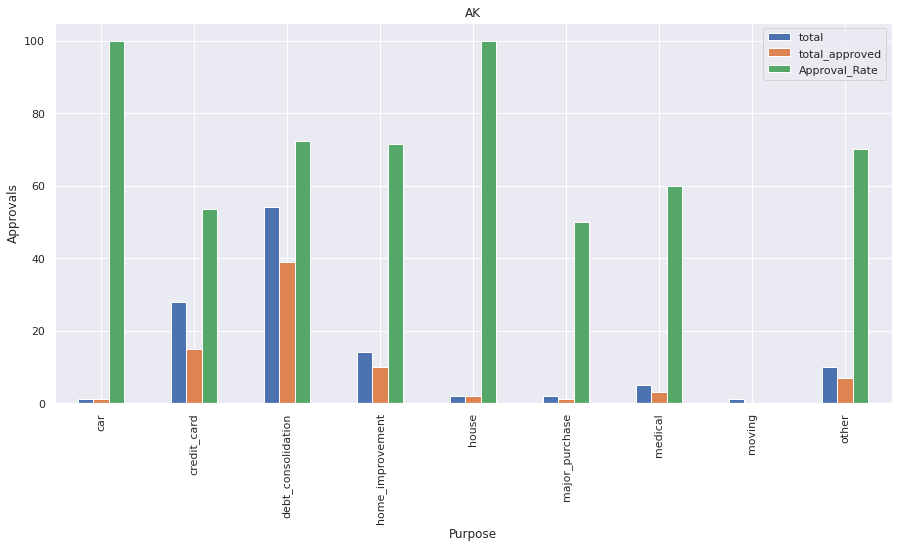

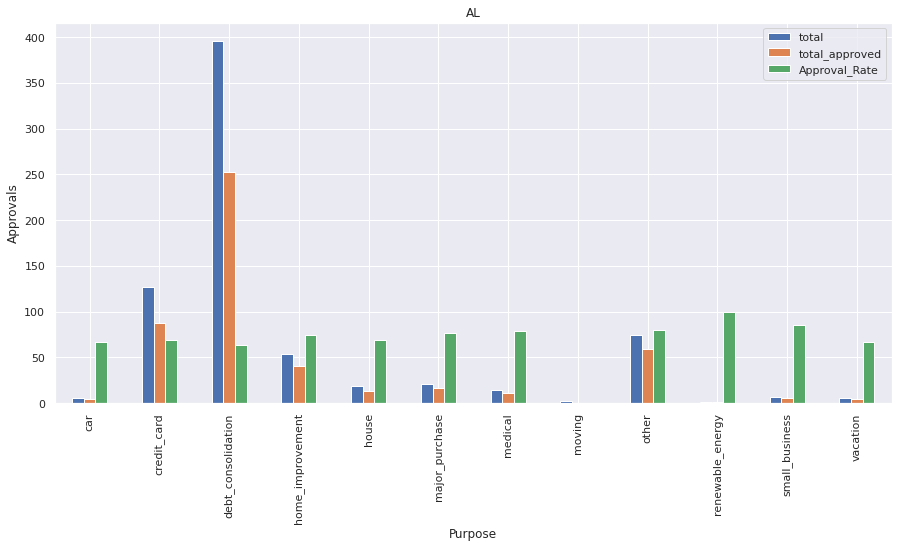

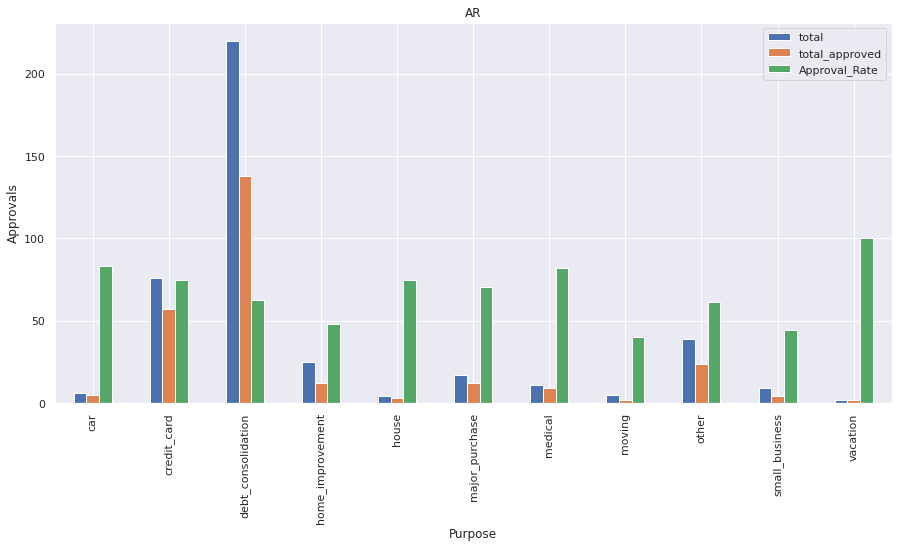

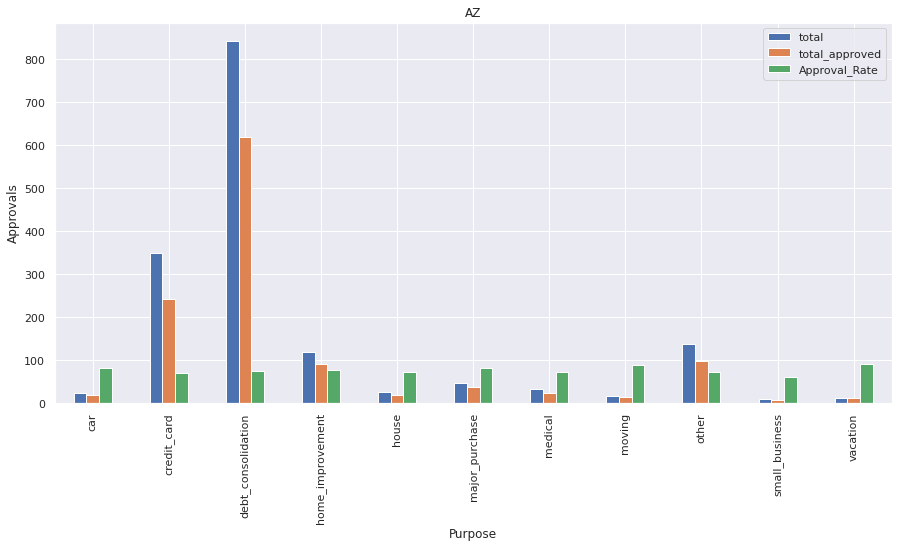

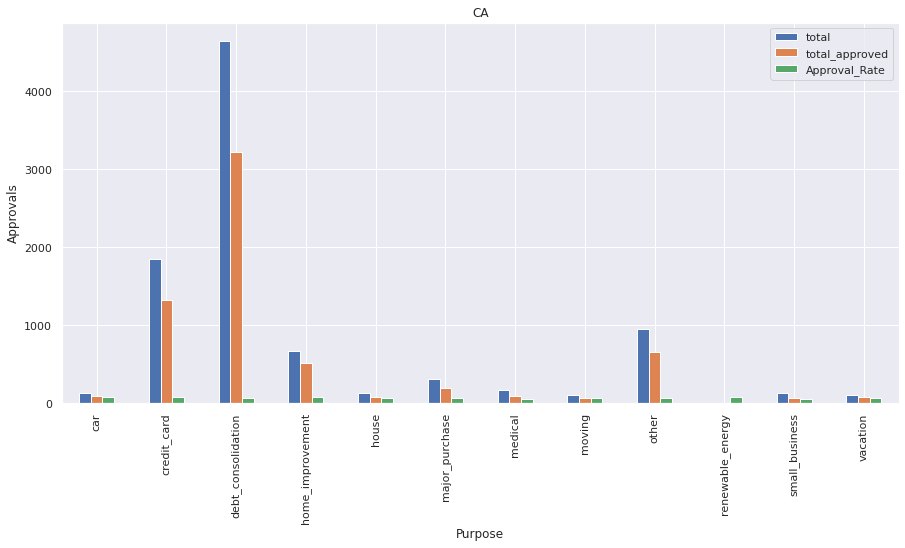

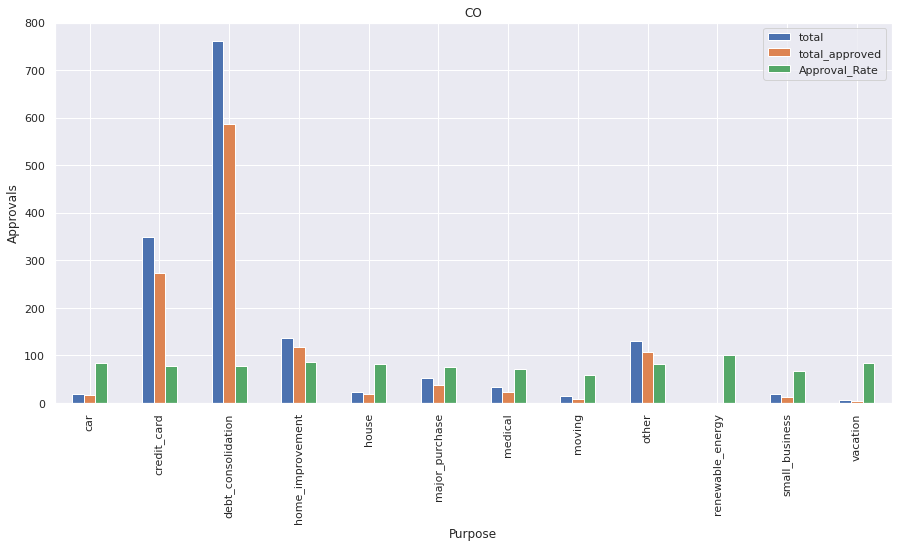

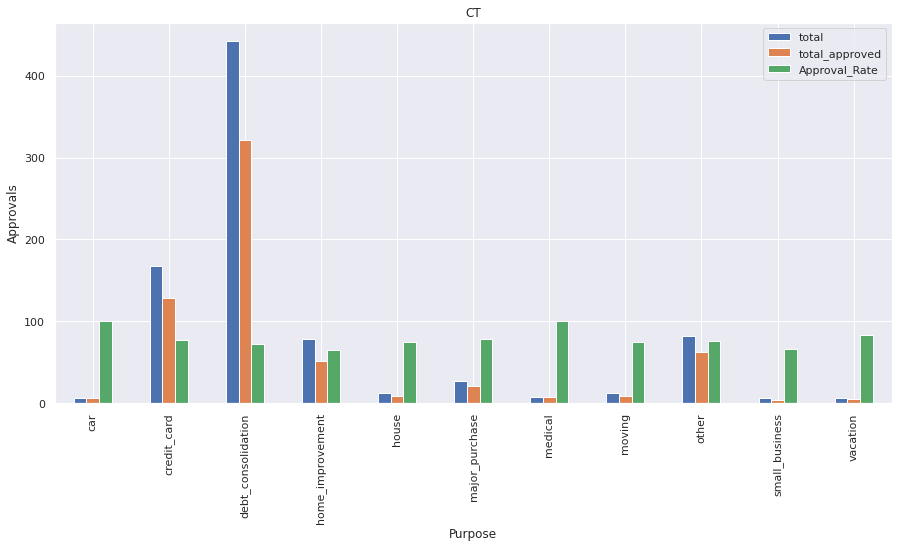

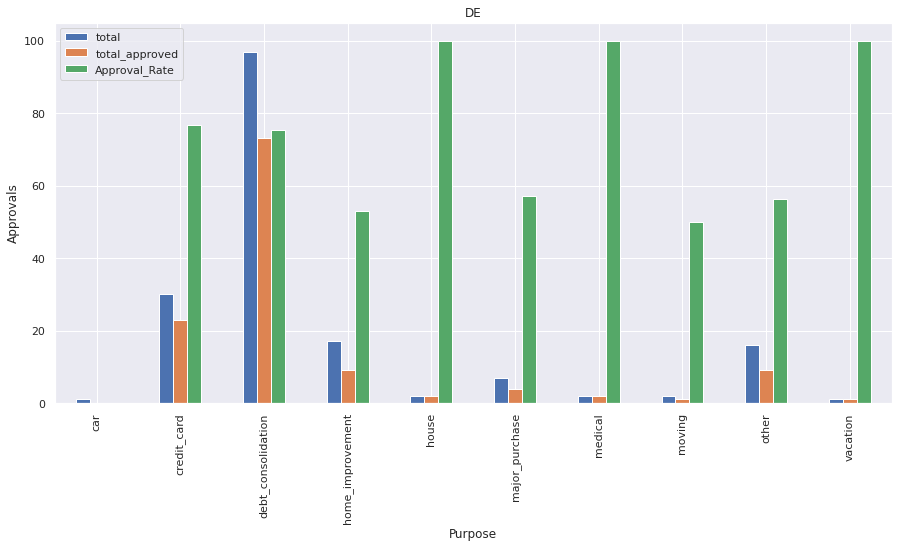

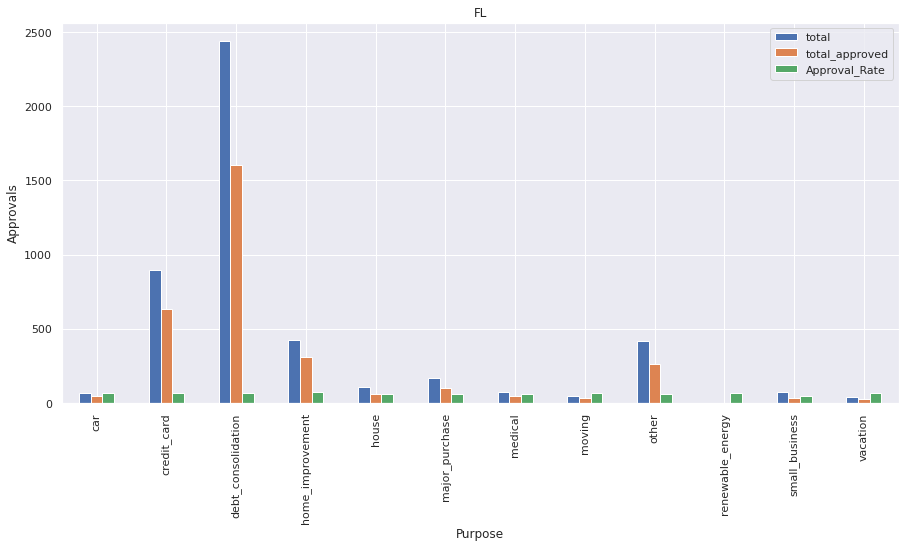

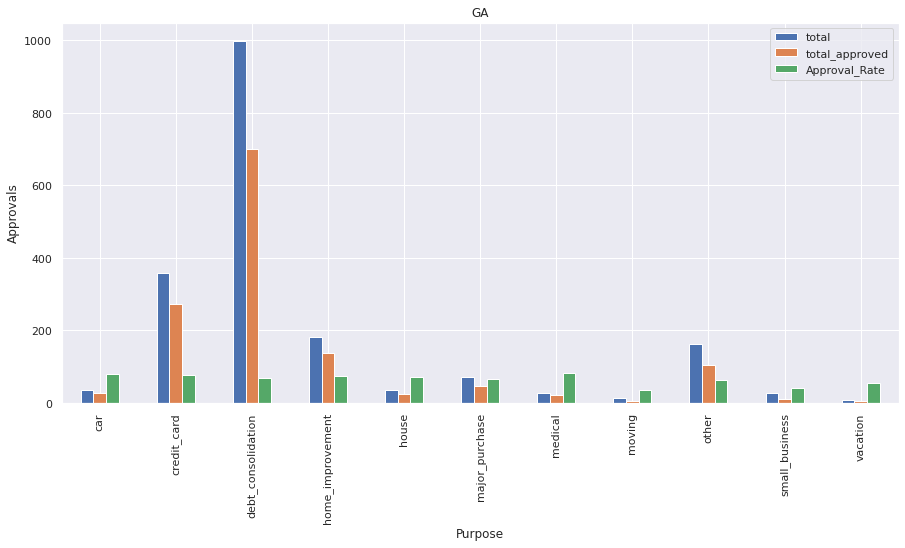

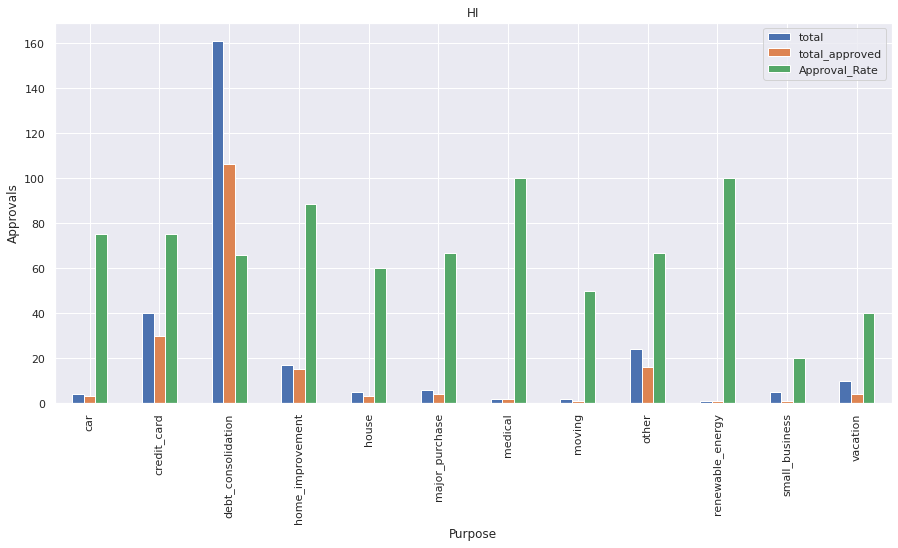

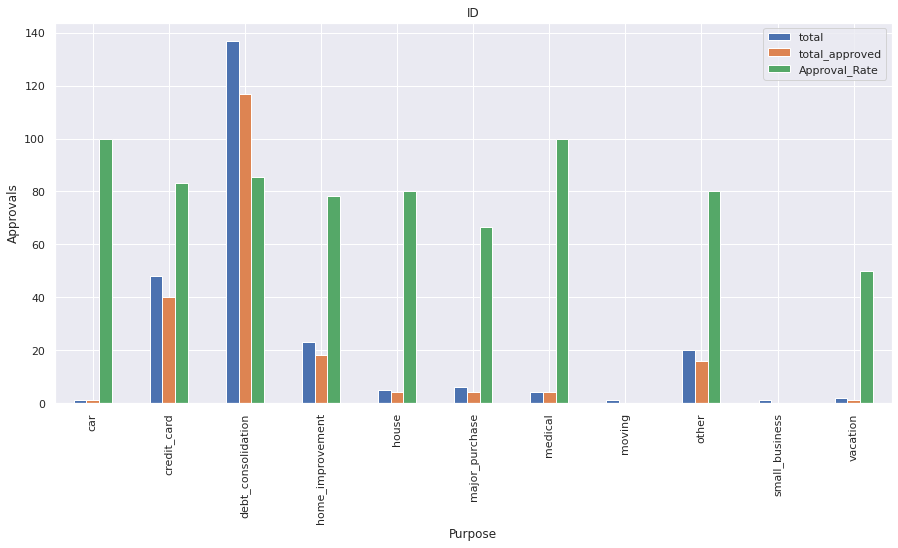

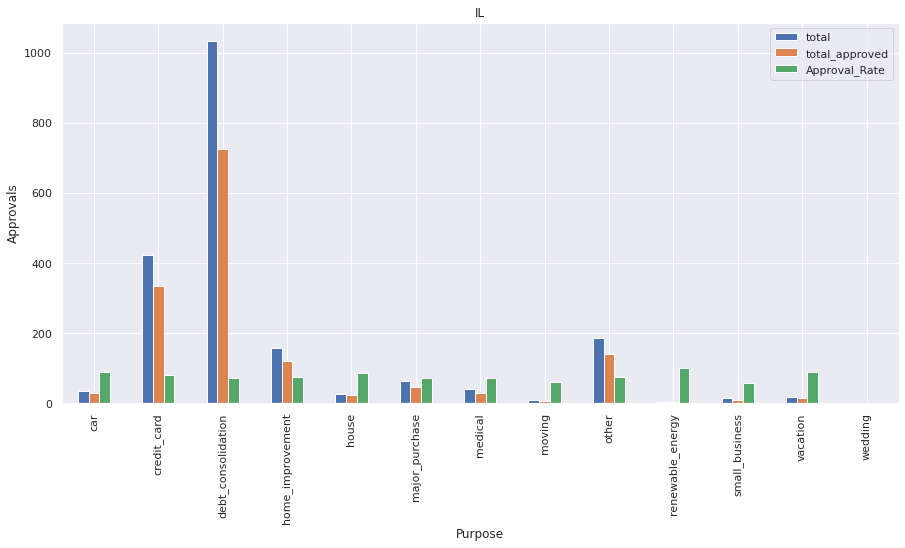

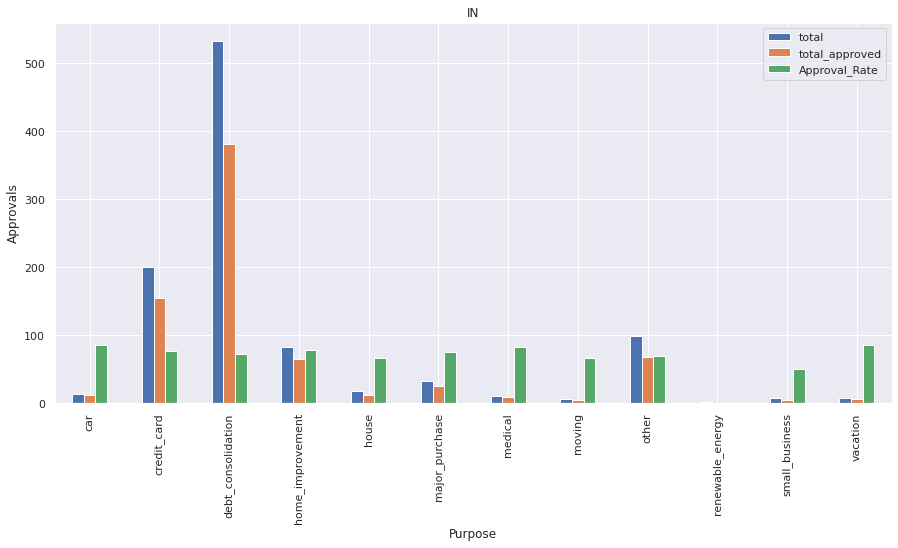

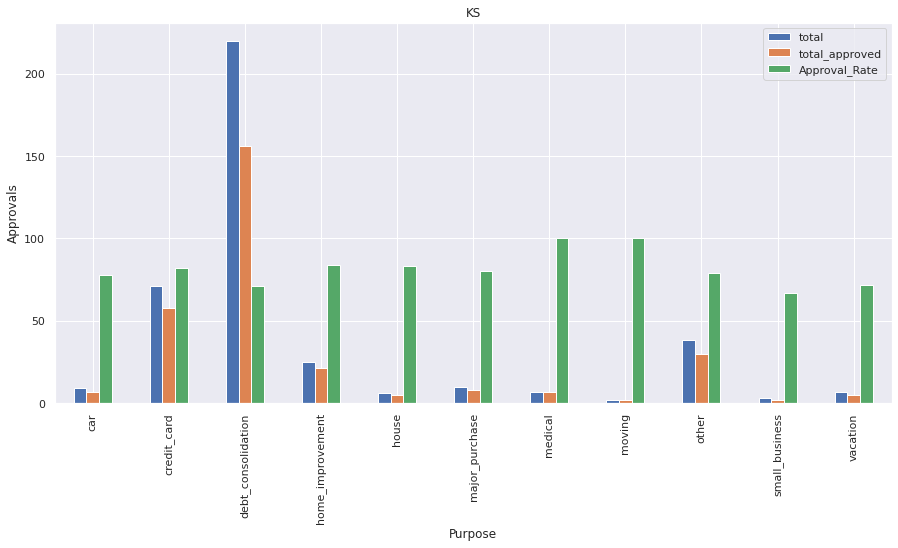

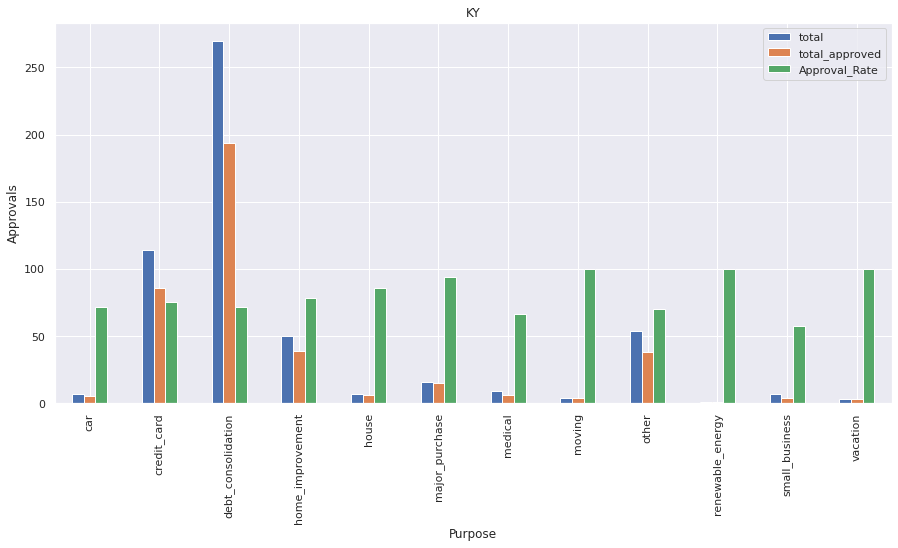

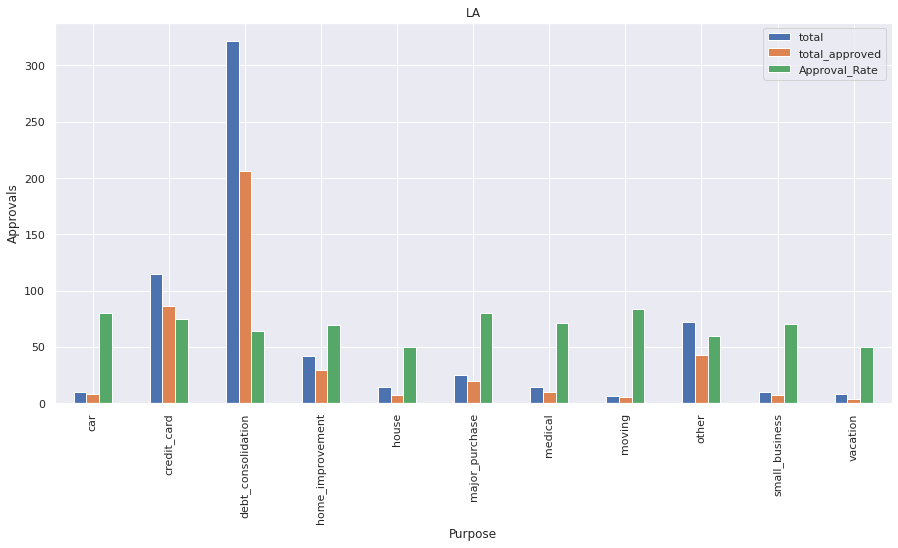

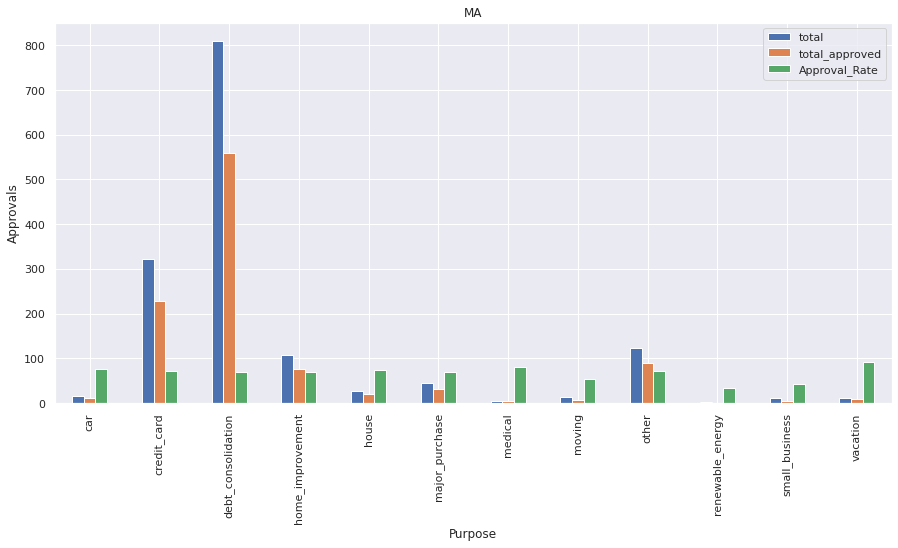

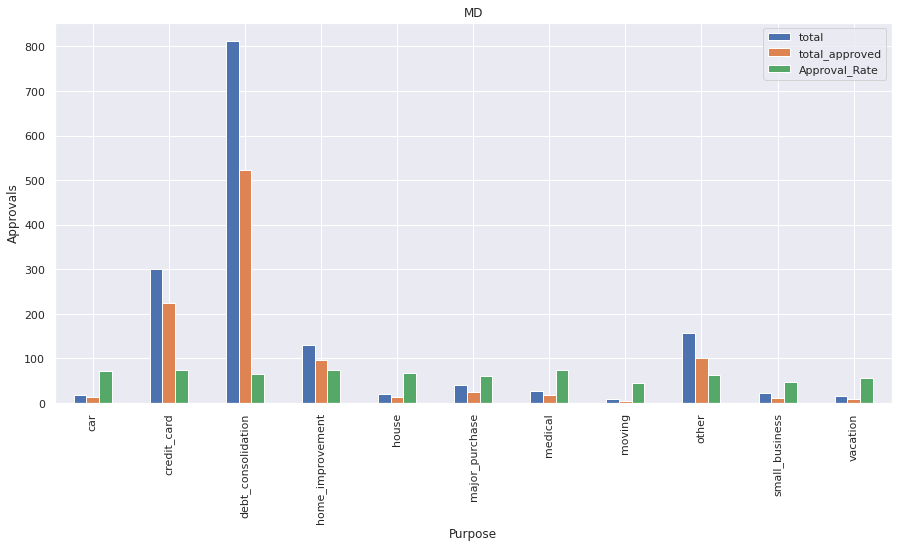

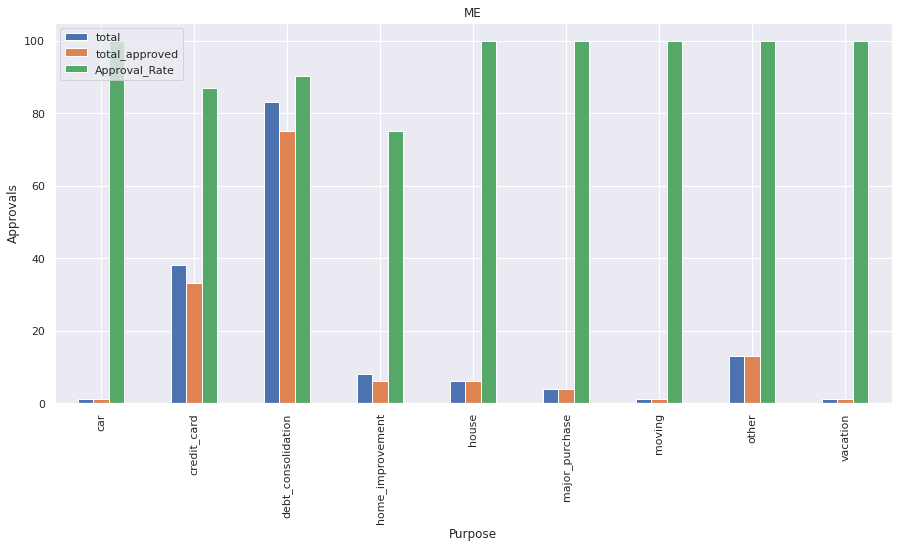

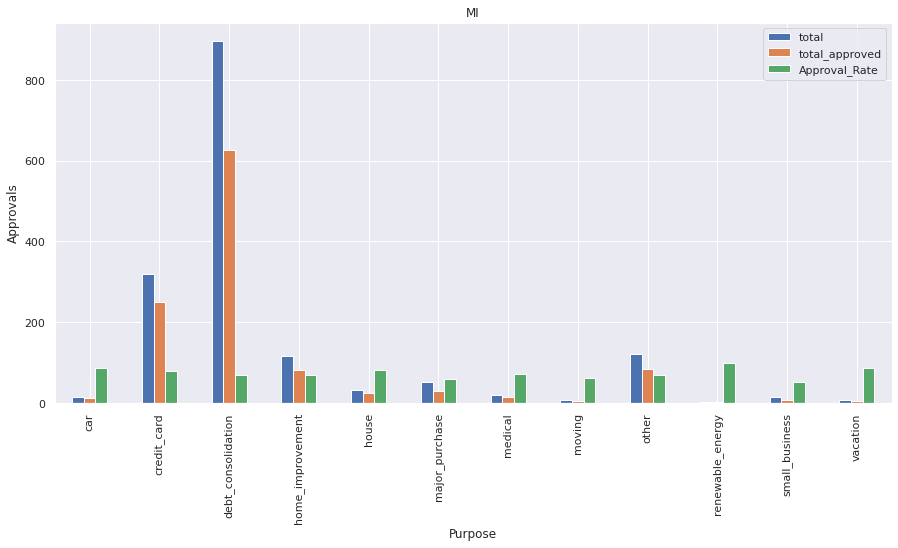

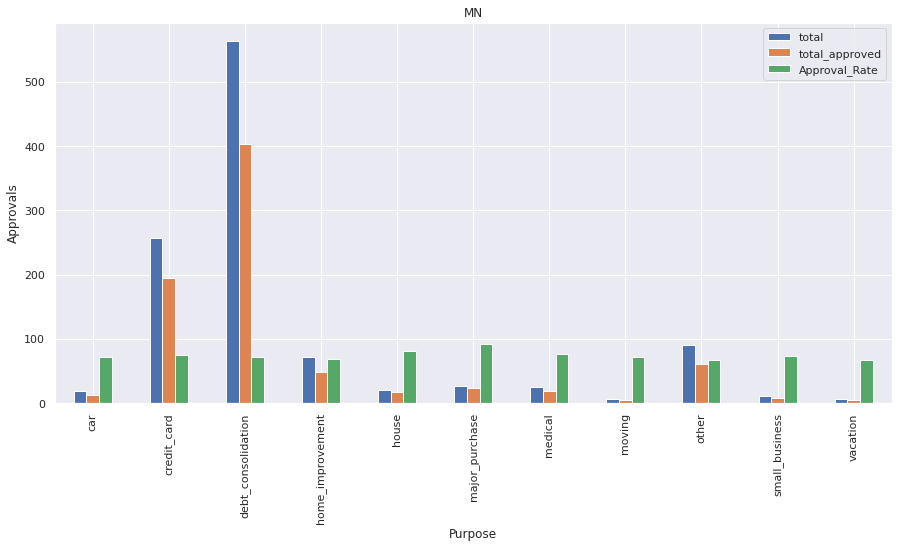

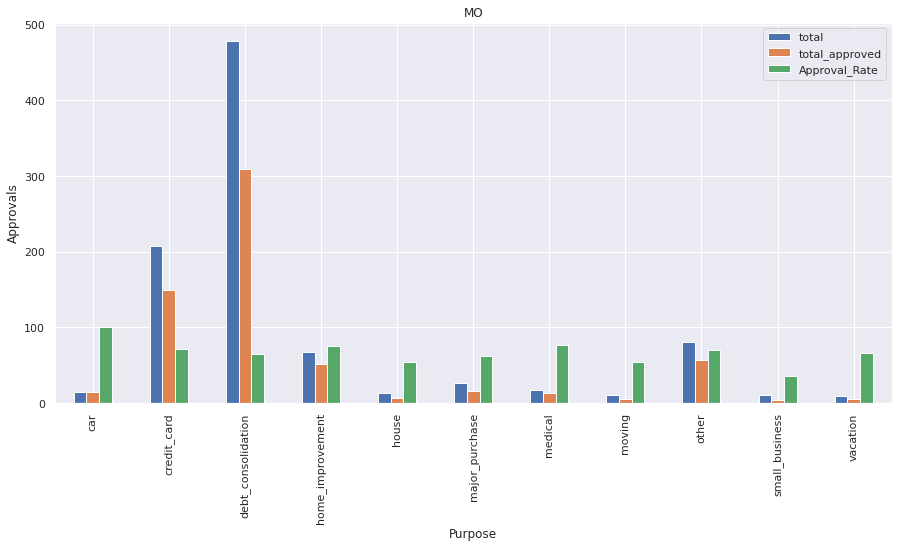

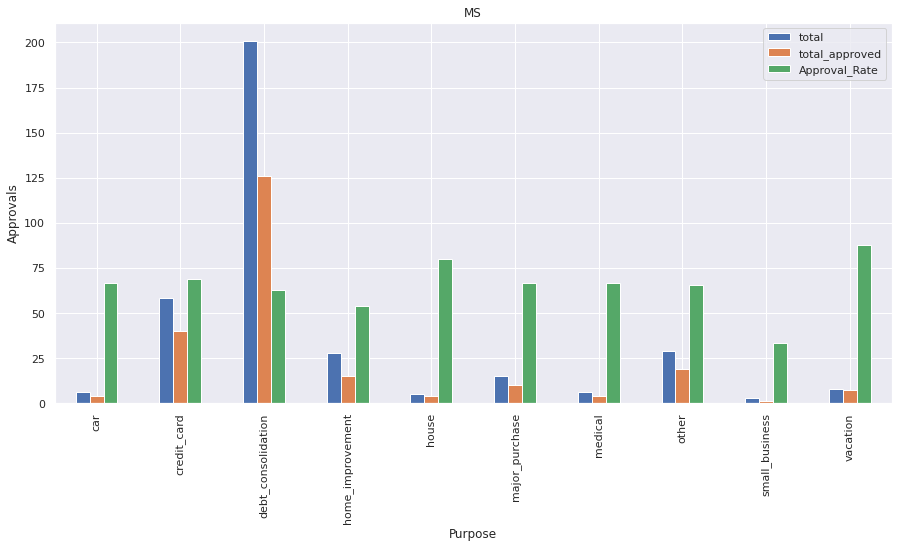

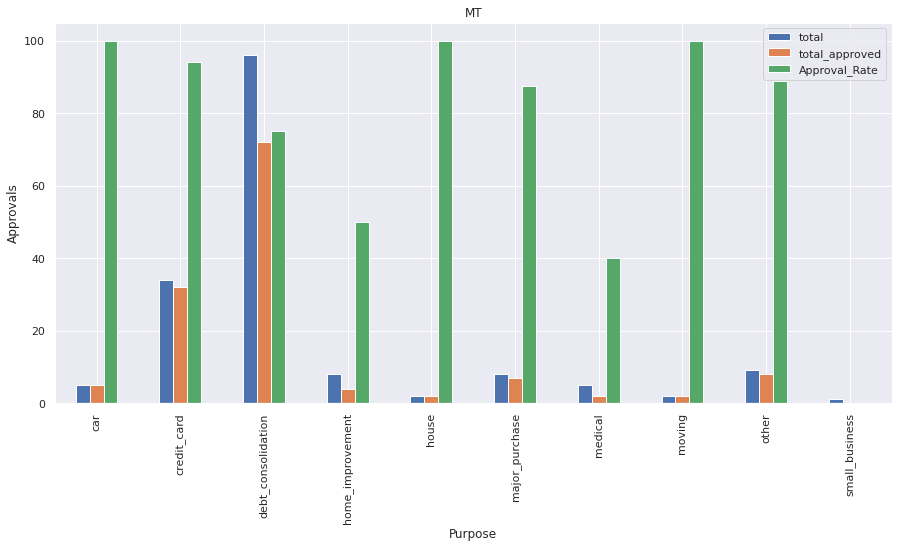

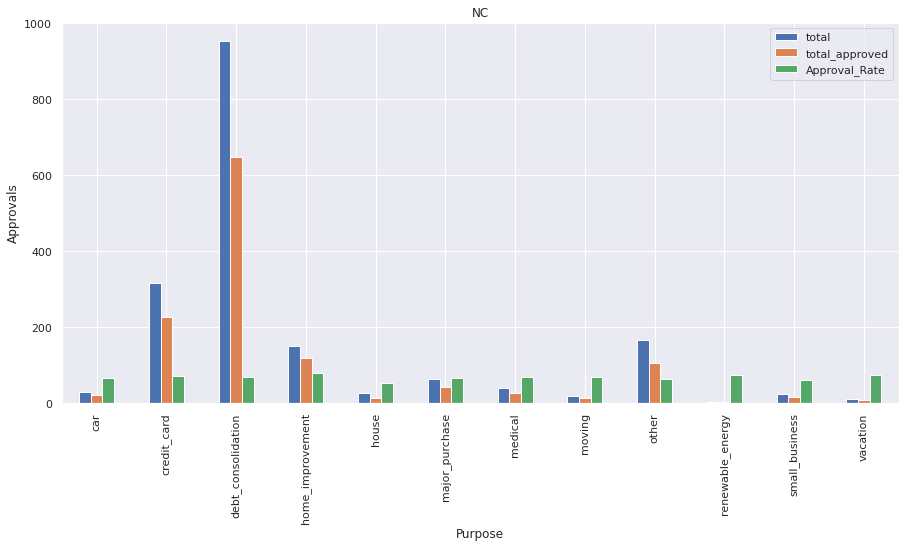

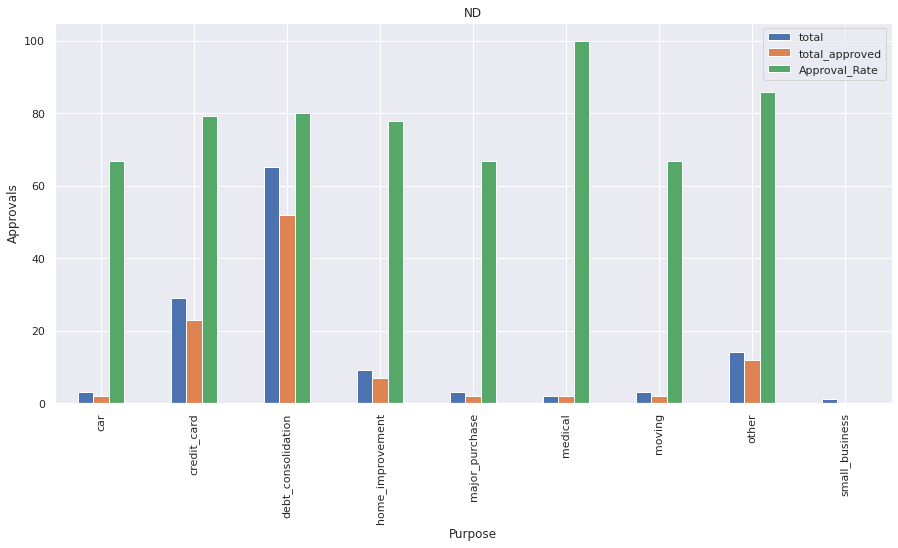

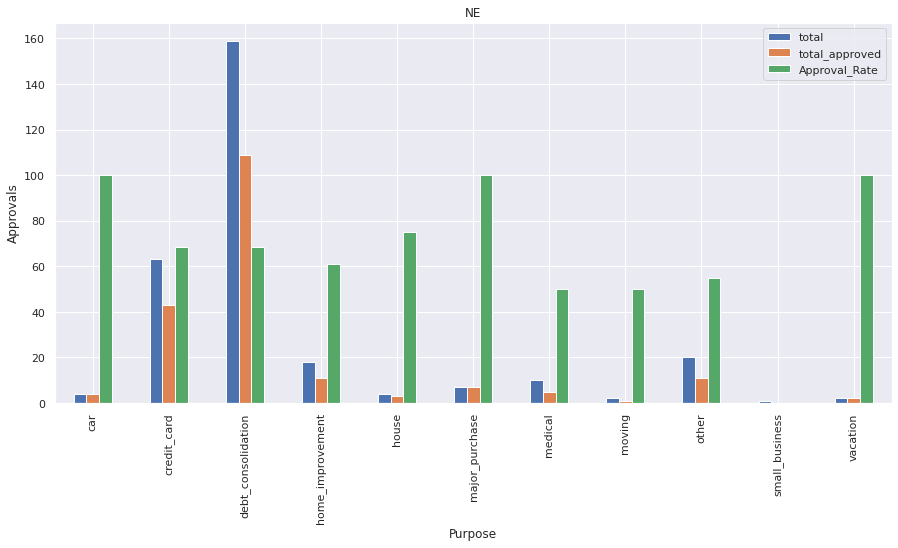

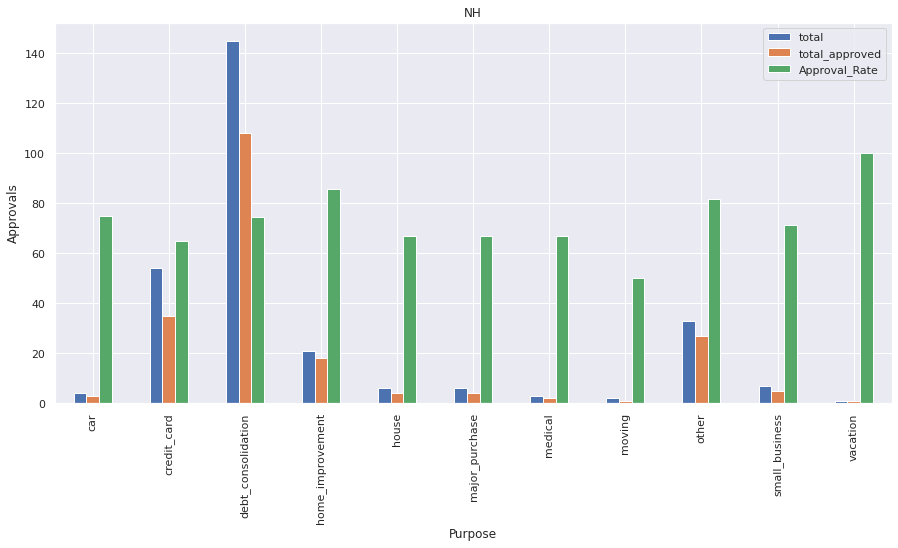

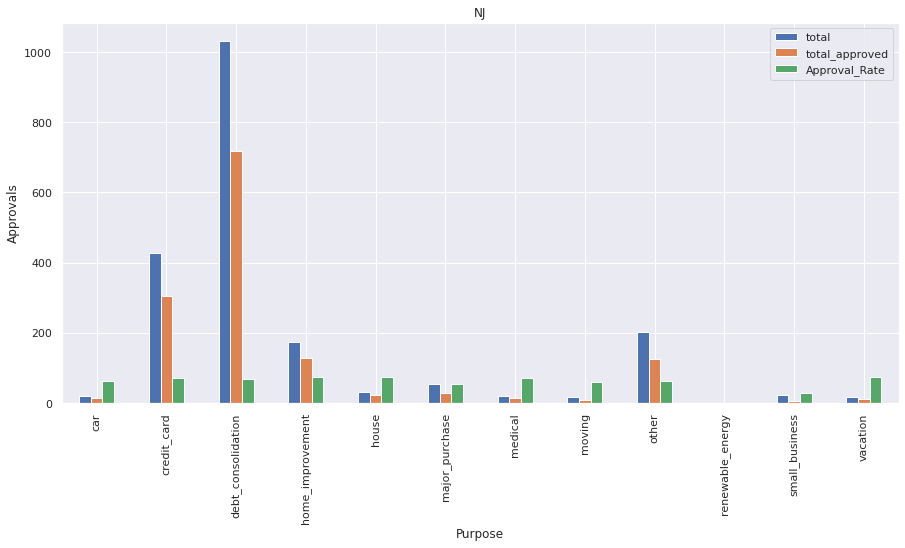

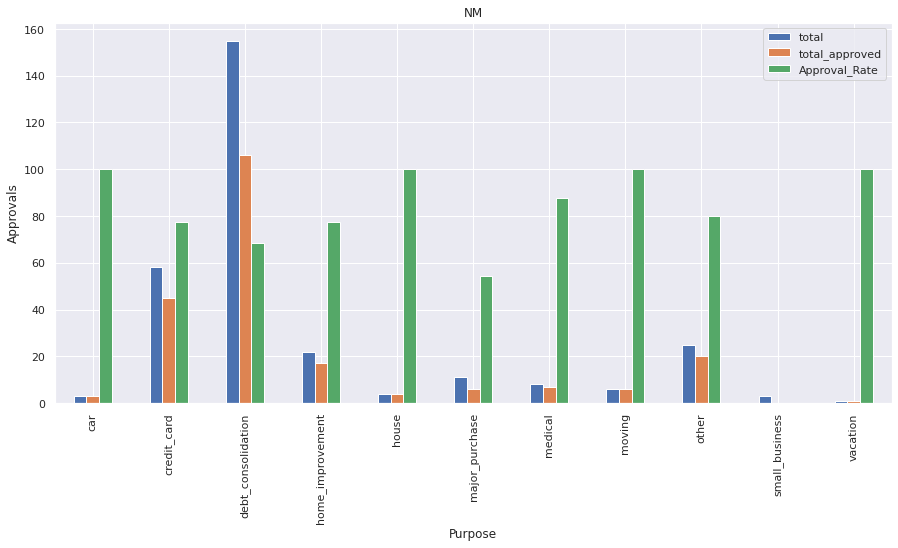

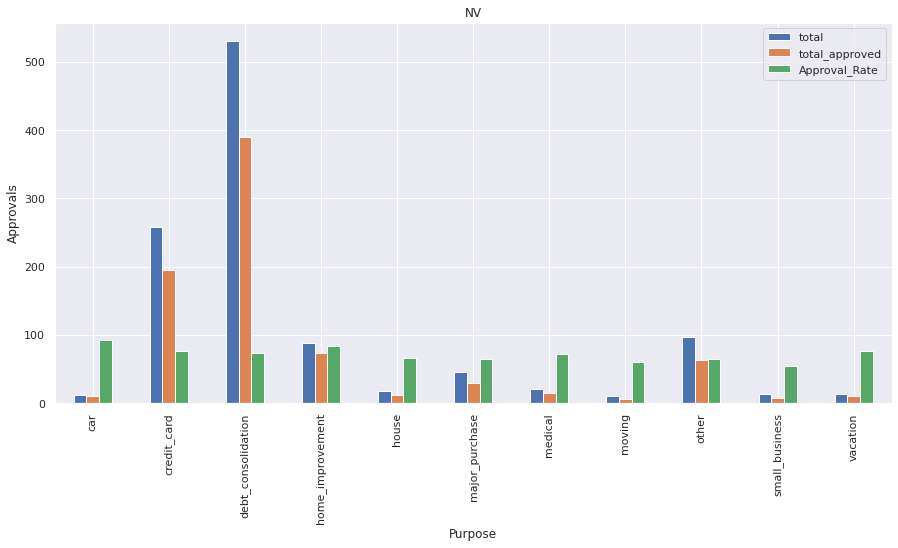

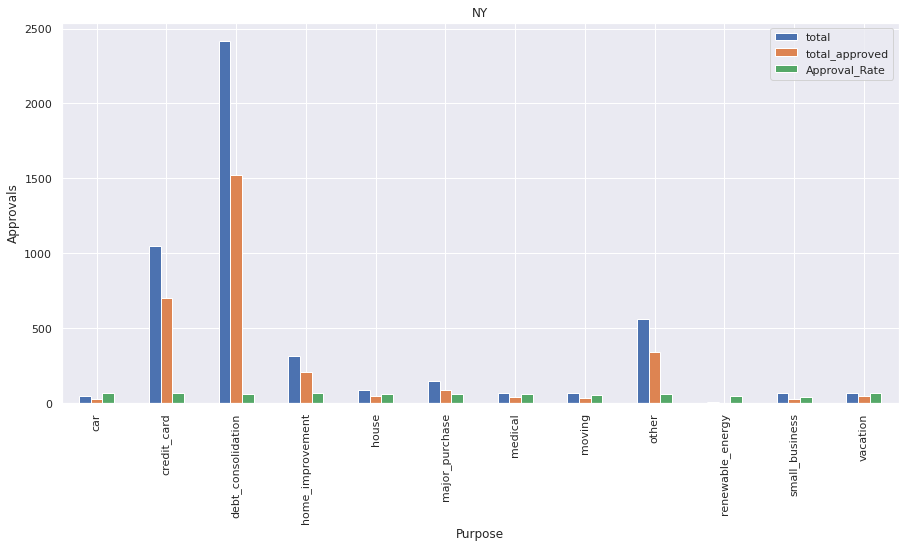

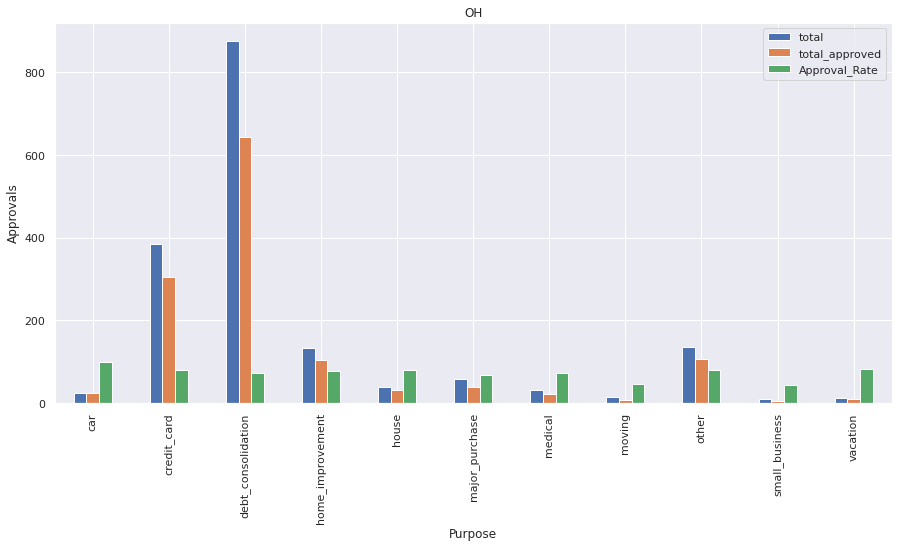

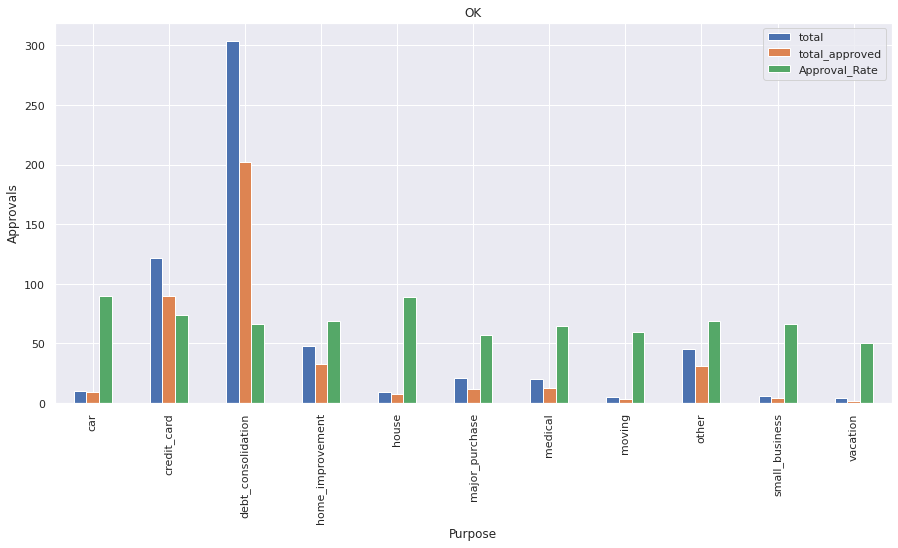

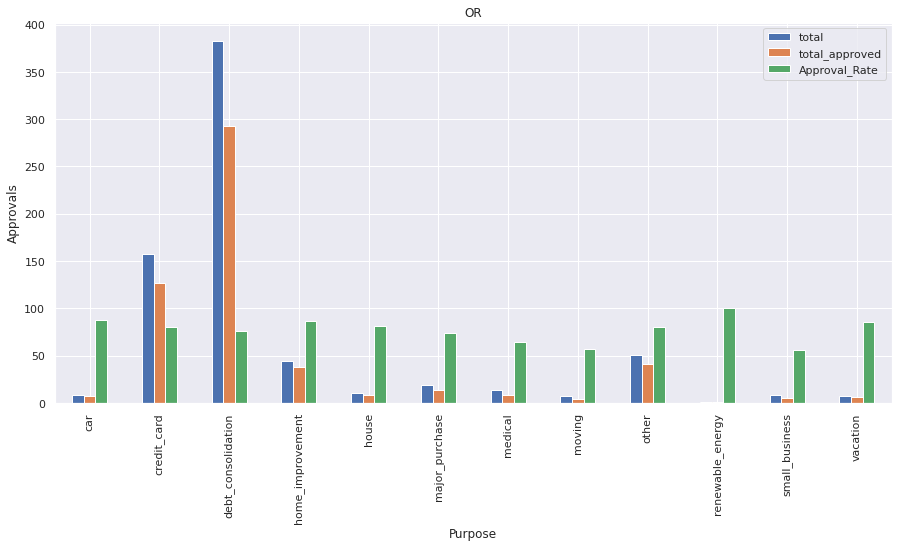

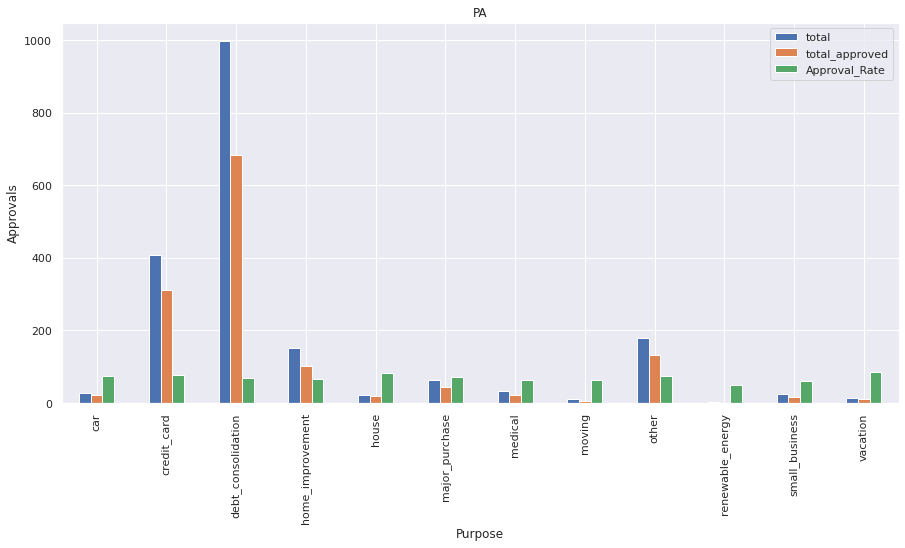

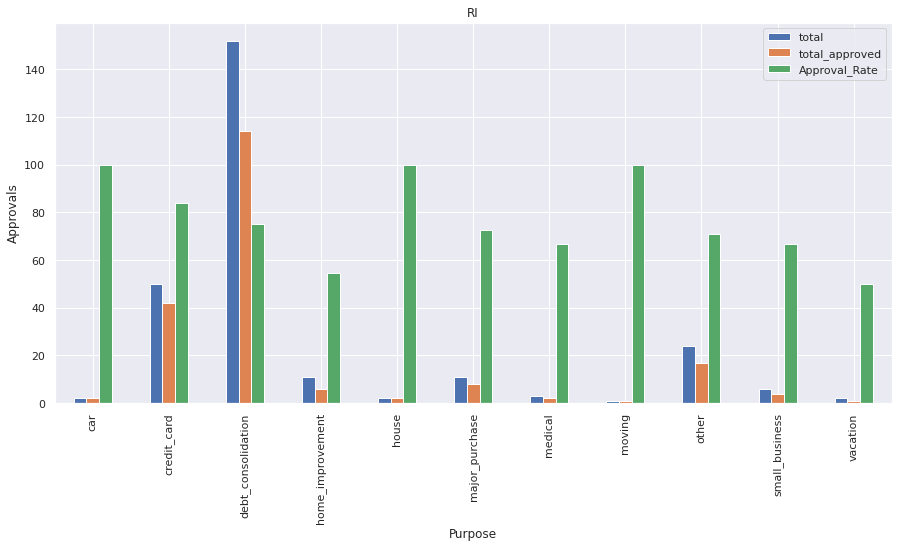

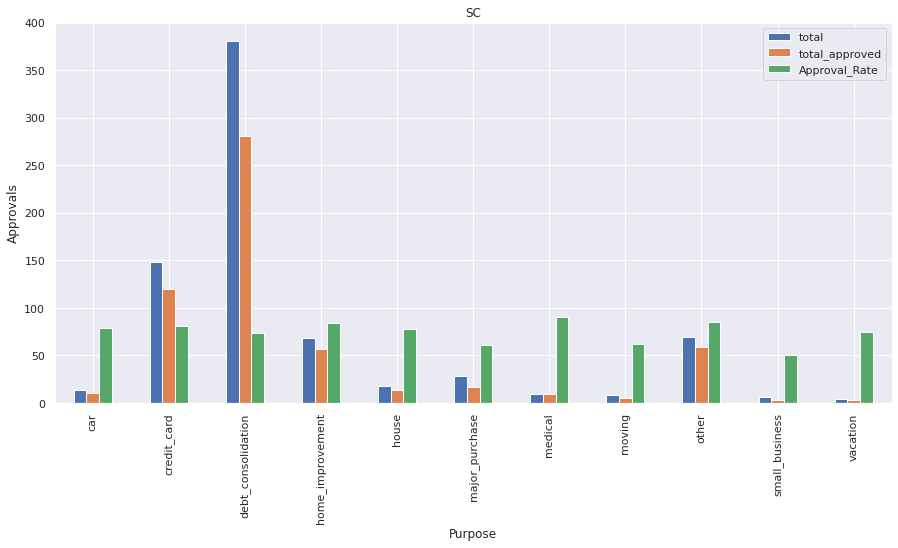

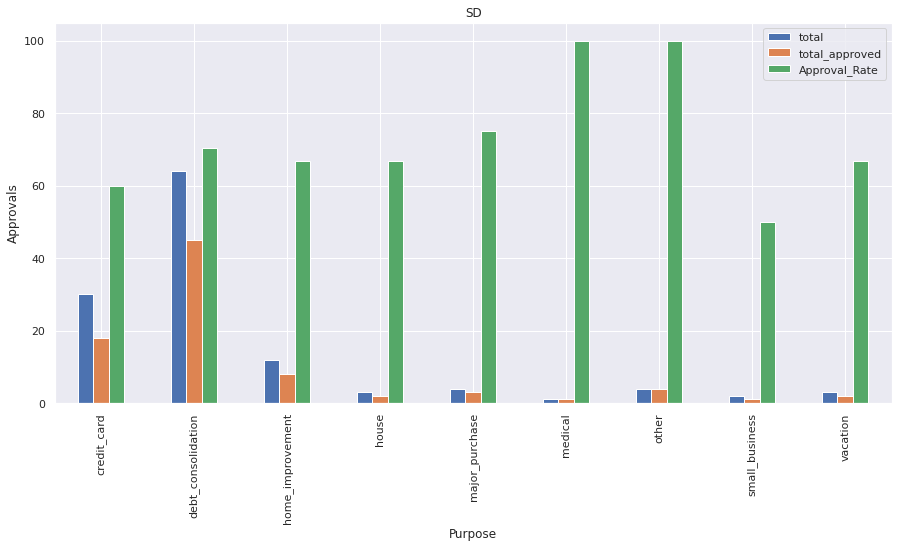

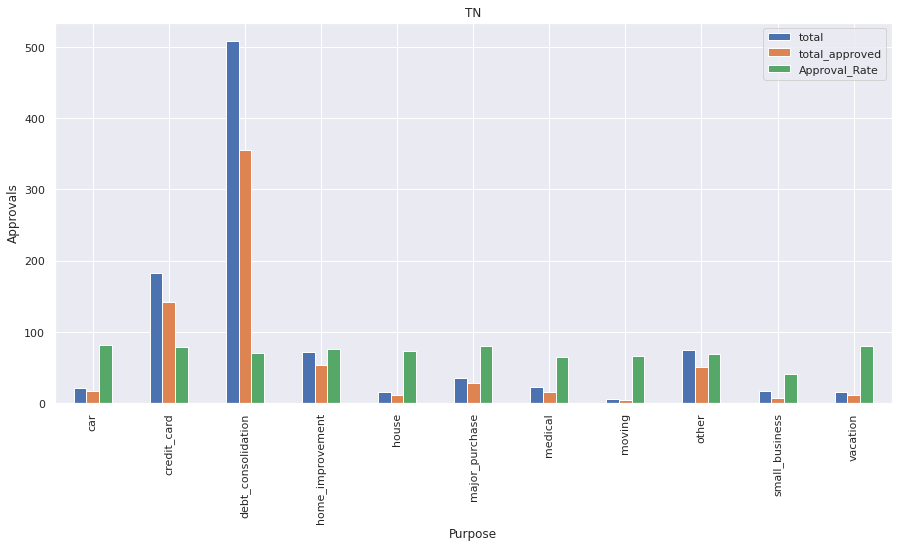

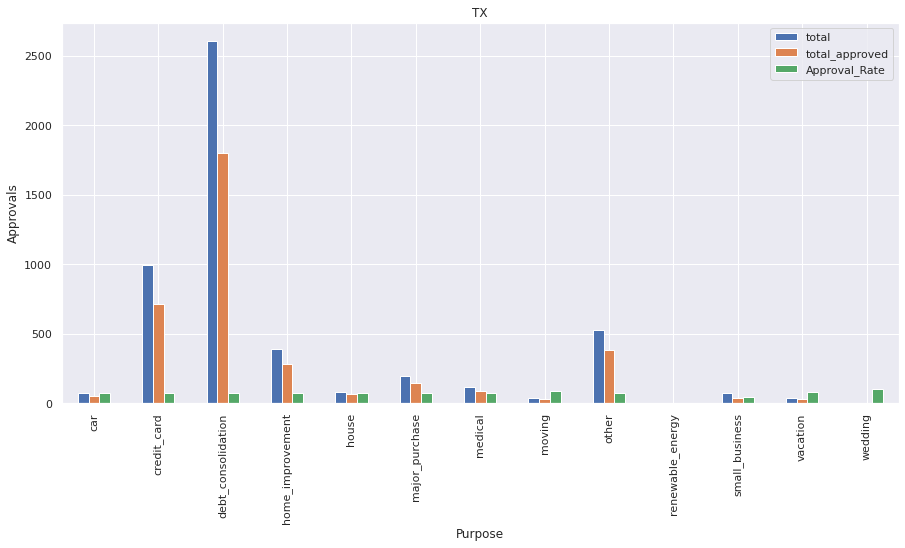

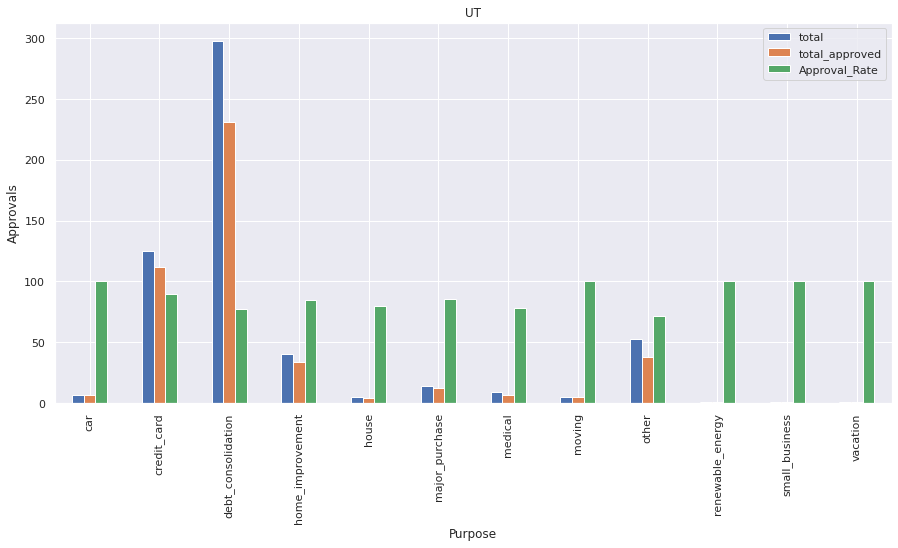

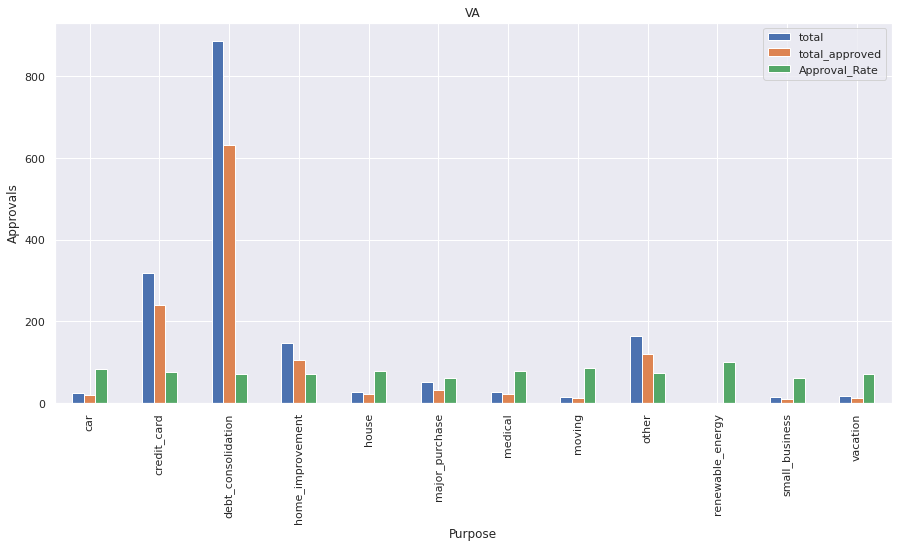

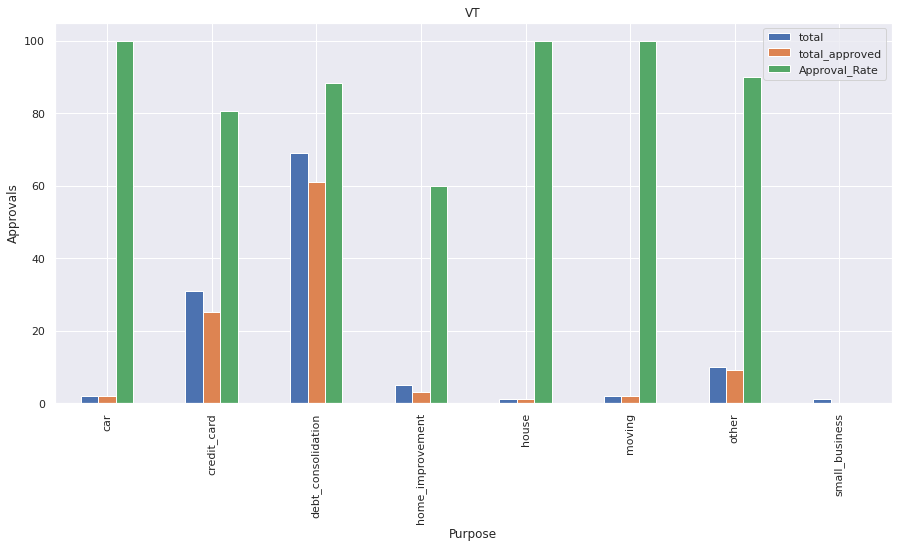

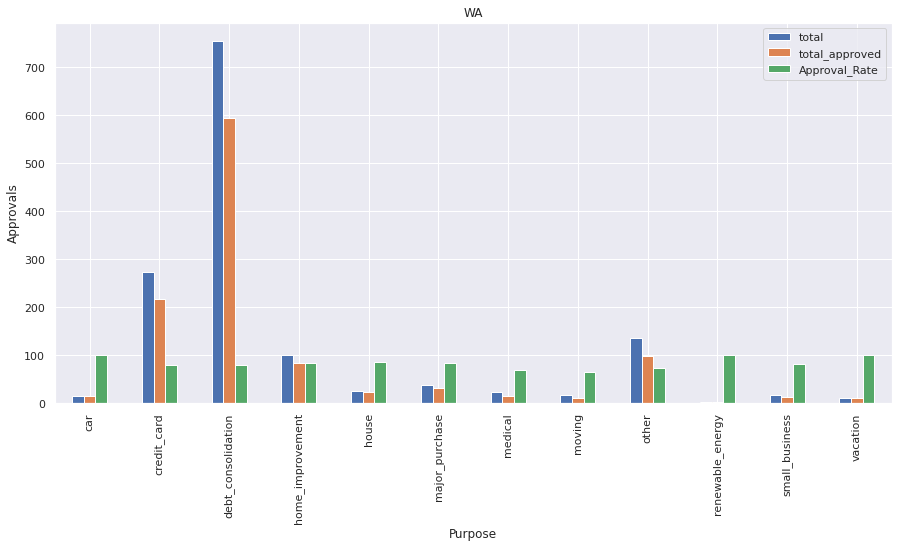

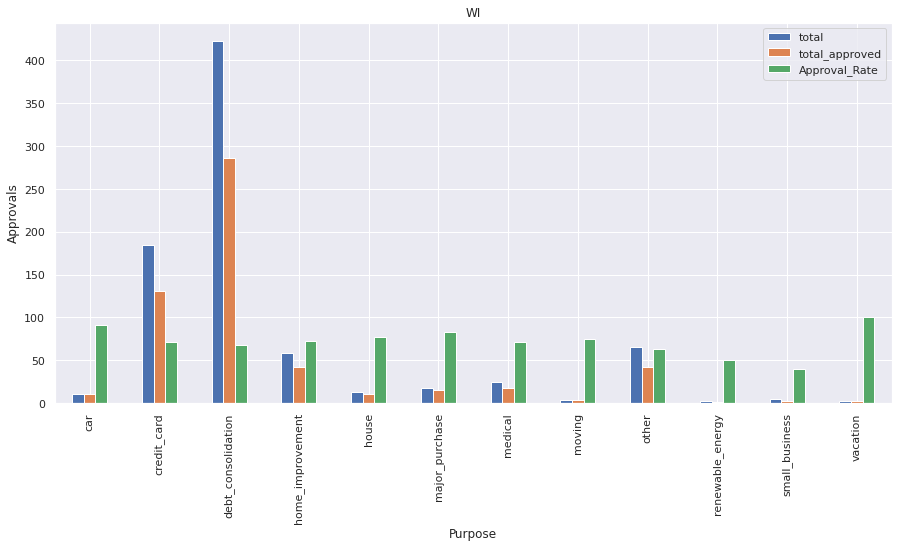

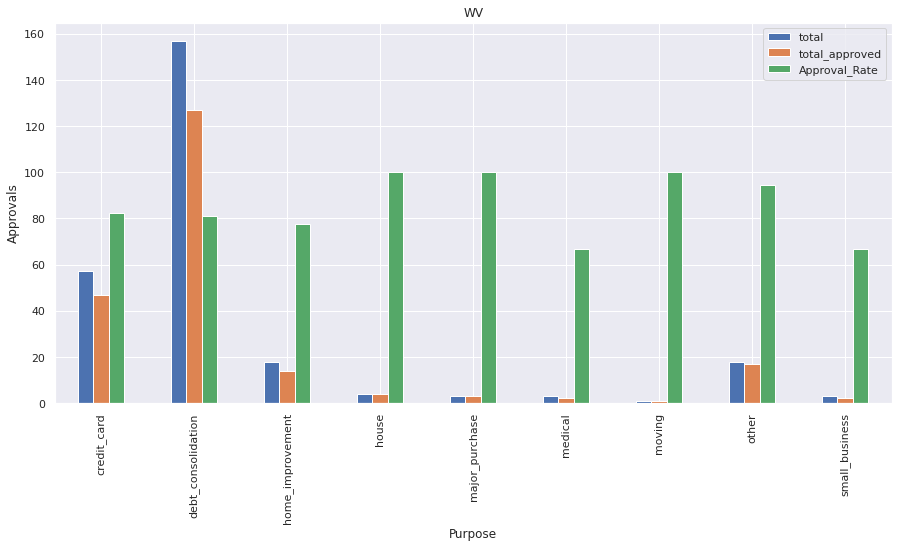

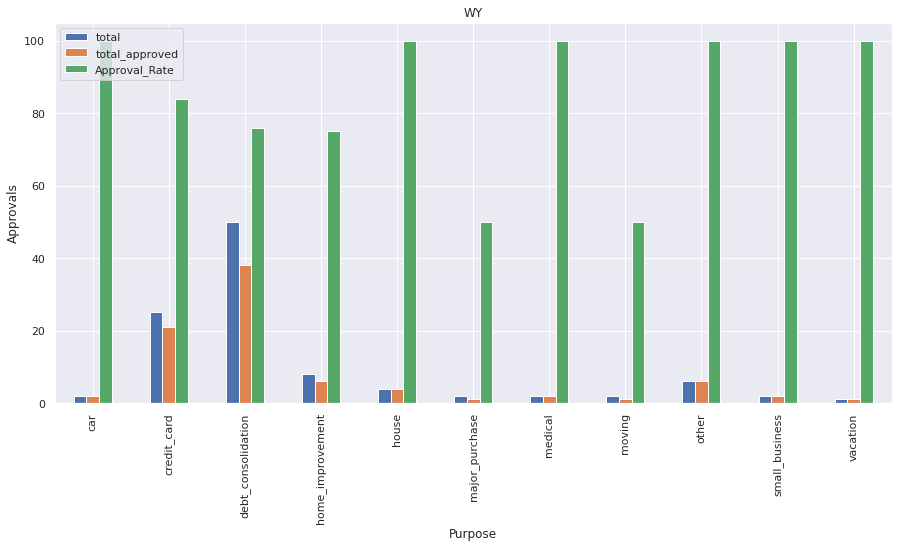

In [ ]:
for i, state in enumerate(sorted(state_set)):
    f, a = plt.subplots(1, 1, figsize=(10, 20))
    df_state.xs(state).plot(kind='bar', ax=a, figsize=(15, 7))
    plt.title(state)
    plt.xlabel("Purpose")
    plt.ylabel("Approvals")

In [ ]:
df_state_overall = df.groupby(by=["addr_state"]).agg(
    total = ('loan_status', 'count'),
    total_approved = ('loan_status', 'sum')
)

In [ ]:
df_state_overall["Approval_Rate"] = (df_state_overall.total_approved/df_state_overall.total)*100
df_state_overall.head(50)

,total,total_approved,Approval_Rate
addr_state,,,
AK,117,78,66.666667
AL,727,494,67.950481
AR,414,268,64.734300
AZ,1615,1180,73.065015
CA,9169,6383,69.615007
CO,1546,1209,78.201811
CT,846,623,73.640662
DE,175,124,70.857143
FL,4762,3162,66.400672


In [ ]:
df_draw = df_state_overall[['Approval_Rate']]
df_draw.head(50)

,Approval_Rate
addr_state,
AK,66.666667
AL,67.950481
AR,64.734300
AZ,73.065015
CA,69.615007
CO,78.201811
CT,73.640662
DE,70.857143
FL,66.400672


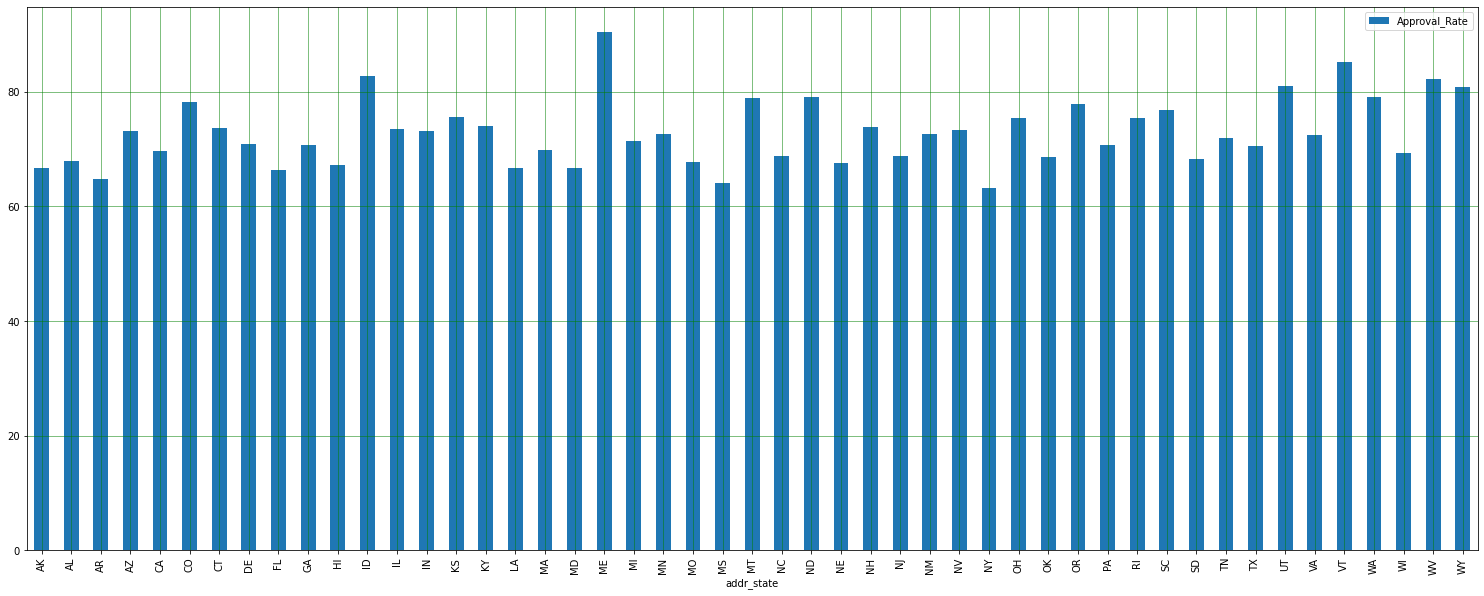

In [ ]:
df_draw.plot(kind='bar', stacked=False, figsize=(26,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Data Mearge and Cleaning

In [ ]:
df_state_overall.head(10)

,total,total_approved,Approval_Rate
addr_state,,,
AK,117,78,66.666667
AL,727,494,67.950481
AR,414,268,64.734300
AZ,1615,1180,73.065015
CA,9169,6383,69.615007
CO,1546,1209,78.201811
CT,846,623,73.640662
DE,175,124,70.857143
FL,4762,3162,66.400672


In [ ]:
Final_df = pd.merge(df, df_state_overall, on="addr_state",how="left")
Final_df.head(15)

,purpose,annual_inc,loan_amnt,term,loan_status,home_ownership,dti,addr_state,Rank,Employed,total,total_approved,Approval_Rate
0,major_purchase,52000.0,3000.0,36,1,RENT,0.58,WA,11.0,1,1408,1112,78.977273
1,other,55000.0,5000.0,36,1,OWN,14.18,GA,25.0,1,1924,1361,70.738046
2,home_improvement,40000.0,7000.0,36,1,MORTGAGE,20.25,TX,6.0,0,5142,3622,70.439518
3,credit_card,55000.0,20300.0,60,0,RENT,26.63,NY,2.0,0,4885,3083,63.111566
4,debt_consolidation,57000.0,30000.0,36,1,OWN,27.58,FL,12.0,1,4762,3162,66.400672
5,house,85000.0,21000.0,60,1,OWN,15.76,NY,2.0,1,4885,3083,63.111566
6,debt_consolidation,150000.0,40000.0,60,1,MORTGAGE,4.09,NY,2.0,1,4885,3083,63.111566
7,credit_card,36610.0,5000.0,36,1,RENT,13.85,NJ,4.0,1,2022,1390,68.743818
8,home_improvement,86000.0,15000.0,36,1,MORTGAGE,9.66,CA,1.0,1,9169,6383,69.615007
9,debt_consolidation,38000.0,12000.0,36,1,RENT,21.45,CA,1.0,1,9169,6383,69.615007


In [ ]:
# Convert all non-numeric values to numeric
categorial_featues = ['purpose']
list_purpose = []

for var in categorial_featues:
    le = preprocessing.LabelEncoder()
    le.fit(Final_df[var])
    # print(list(le.classes_)) # shows unique values
    # print(le.transform(Final_df[var])) # assigns a numeric value
    Final_df[var]=le.fit_transform(Final_df[var].astype('str'))
    list_purpose = list(le.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11])) # returns the corresponding colun value for that numeric value

In [ ]:
# Convert all non-numeric values to numeric
categorial_featues = ['home_ownership']
list_house = []

for var in categorial_featues:
    le = preprocessing.LabelEncoder()
    le.fit(Final_df[var])
    # print(list(le.classes_)) # shows unique values
    # print(le.transform(Final_df[var])) # assigns a numeric value
    Final_df[var]=le.fit_transform(Final_df[var].astype('str'))
    list_house = list(le.inverse_transform([0,1,2,3])) # returns the corresponding colun value for that numeric value

In [ ]:
# Convert all non-numeric values to numeric
categorial_featues = ['addr_state']
list_addr = []

for var in categorial_featues:
    le = preprocessing.LabelEncoder()
    le.fit(Final_df[var])
    # print(list(le.classes_)) # shows unique values
    # print(le.transform(Final_df[var])) # assigns a numeric value
    Final_df[var]=le.fit_transform(Final_df[var].astype('str'))
    list_addr = list(le.inverse_transform([0,1,2,3,4])) # returns the corresponding colun value for that numeric value

In [ ]:
Final_df.head(10)

,purpose,annual_inc,loan_amnt,term,loan_status,home_ownership,dti,addr_state,Rank,Employed,total,total_approved,Approval_Rate
0,5,52000.0,3000.0,36,1,3,0.58,45,11.0,1,1408,1112,78.977273
1,8,55000.0,5000.0,36,1,2,14.18,9,25.0,1,1924,1361,70.738046
2,3,40000.0,7000.0,36,1,1,20.25,41,6.0,0,5142,3622,70.439518
3,1,55000.0,20300.0,60,0,3,26.63,32,2.0,0,4885,3083,63.111566
4,2,57000.0,30000.0,36,1,2,27.58,8,12.0,1,4762,3162,66.400672
5,4,85000.0,21000.0,60,1,2,15.76,32,2.0,1,4885,3083,63.111566
6,2,150000.0,40000.0,60,1,1,4.09,32,2.0,1,4885,3083,63.111566
7,1,36610.0,5000.0,36,1,3,13.85,29,4.0,1,2022,1390,68.743818
8,3,86000.0,15000.0,36,1,1,9.66,4,1.0,1,9169,6383,69.615007
9,2,38000.0,12000.0,36,1,3,21.45,4,1.0,1,9169,6383,69.615007


In [ ]:
for index, ele in enumerate(list_addr):
  print(index,ele)

0 AK
1 AL
2 AR
3 AZ
4 CA


# Feature Importance

We observed that PCA also didn't give us a good vision for picking the important features for our dataset. So, we are now procceding with finding out the Feature Importance to know the most important feature required for our dataset based on the target feature.

In [ ]:
Final_df = Final_df[['purpose','annual_inc','loan_amnt','term','loan_status','home_ownership','Employed','dti','addr_state','Rank','Approval_Rate']]
Final_df.head(5)

,purpose,annual_inc,loan_amnt,term,loan_status,home_ownership,Employed,dti,addr_state,Rank,Approval_Rate
0,5,52000.0,3000.0,36,1,3,1,0.58,45,11.0,78.977273
1,8,55000.0,5000.0,36,1,2,1,14.18,9,25.0,70.738046
2,3,40000.0,7000.0,36,1,1,0,20.25,41,6.0,70.439518
3,1,55000.0,20300.0,60,0,3,0,26.63,32,2.0,63.111566
4,2,57000.0,30000.0,36,1,2,1,27.58,8,12.0,66.400672


In [ ]:
y = Final_df['loan_status']

In [ ]:
Final_df.drop(['loan_status'], axis=1, inplace=True)

[0.08289549 0.26734047 0.19311474 0.01792861 0.0252172  0.00876086
 0.29038383 0.03641707 0.03653521 0.04140653]


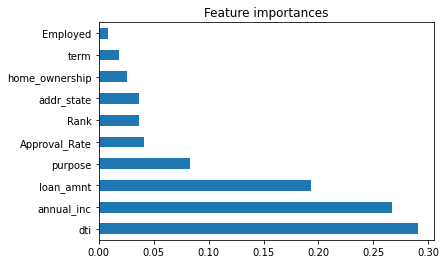

In [ ]:
model = ExtraTreesClassifier(criterion='gini') # “gini” for the Gini impurity and “entropy” for the information gain.
model.fit(Final_df, y)
print(model.feature_importances_) # use inbuilt class feature_importances of tree based classifiers
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Final_df.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Feature importances")
plt.show()

In [ ]:
feat_importances

purpose           0.082895
annual_inc        0.267340
loan_amnt         0.193115
term              0.017929
home_ownership    0.025217
Employed          0.008761
dti               0.290384
addr_state        0.036417
Rank              0.036535
Approval_Rate     0.041407
dtype: float64

# Muller Loop

In [ ]:
names = ["XgBoost","Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]


classifiers = [
    XGBClassifier(),
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=9, n_estimators=140, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


# Train-Test split without purpose, with state


In [ ]:
X = Final_df[['loan_amnt','annual_inc','dti','addr_state','Approval_Rate']]
# y = Final_df[['loan_status']]

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

## Model training and Classifier comparison

Classifier = XgBoost, Score (test, accuracy) = 70.84, Training time = 2.00 seconds
Classifier = Nearest Neighbors, Score (test, accuracy) = 53.20, Training time = 0.00 seconds
Classifier = Linear SVM, Score (test, accuracy) = 70.55, Training time = 143.00 seconds
Classifier = RBF SVM, Score (test, accuracy) = 70.44, Training time = 1348.00 seconds
Classifier = Decision Tree, Score (test, accuracy) = 70.61, Training time = 0.00 seconds
Classifier = Random Forest, Score (test, accuracy) = 70.61, Training time = 4.00 seconds
Classifier = Neural Net, Score (test, accuracy) = 70.76, Training time = 6.00 seconds
Classifier = AdaBoost, Score (test, accuracy) = 70.54, Training time = 2.00 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 70.32, Training time = 0.00 seconds
Classifier = QDA, Score (test, accuracy) = 70.27, Training time = 0.00 seconds
--------------------------------------------------------------------------------
Best --> Classifier = XgBoost, Score (test, accuracy) =

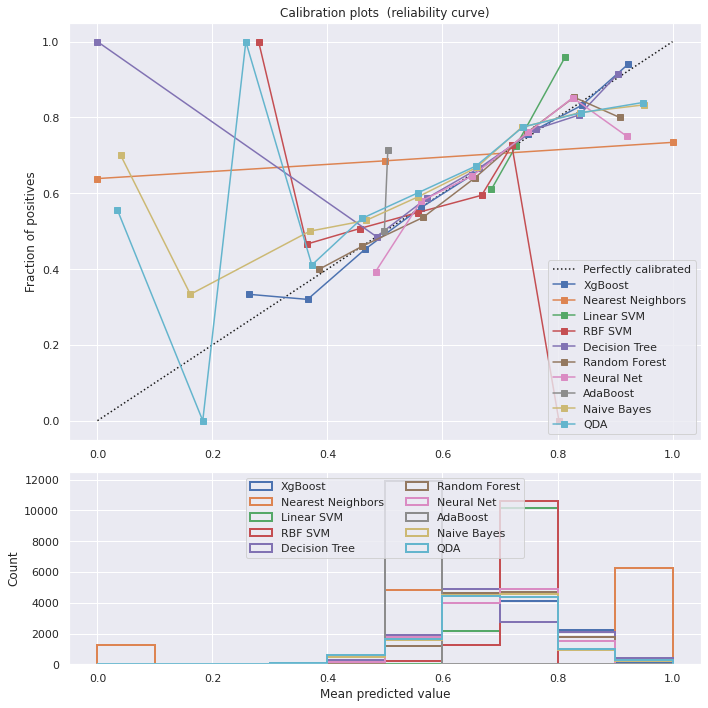

In [ ]:
max_score = 0.0
max_class = ''
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.localtime()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    diff = (time.mktime(time.localtime()) - time.mktime(start_time))
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (diff))
    
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name, histtype="step", lw=2)
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))


ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

# Train-Test split with purpose,dti, address


In [ ]:
X = Final_df[['purpose','dti','addr_state','Approval_Rate']]
# y = Final_df[['loan_status']]

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

## Model training and Classifier comparison

In [ ]:
max_score = 0.0
max_class = ''
algos_df = pd.DataFrame(columns = [])
row_index = 0

# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.localtime()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    diff = (time.mktime(time.localtime()) - time.mktime(start_time))
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (diff))
    algos_df.loc[row_index, 'Name'] = name
    algos_df.loc[row_index, 'Score'] = score
    algos_df.loc[row_index, 'Training Time'] = diff
    row_index += 1

    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

algos_df.sort_values(by = ['Score'], ascending = False, inplace = True)    

algos_df.head(12)

Classifier = XgBoost, Score (test, accuracy) = 70.64, Training time = 1.00 seconds
Classifier = Nearest Neighbors, Score (test, accuracy) = 51.40, Training time = 1.00 seconds
Classifier = Linear SVM, Score (test, accuracy) = 70.55, Training time = 131.00 seconds
Classifier = RBF SVM, Score (test, accuracy) = 70.46, Training time = 1528.00 seconds
Classifier = Decision Tree, Score (test, accuracy) = 70.48, Training time = 0.00 seconds
Classifier = Random Forest, Score (test, accuracy) = 70.51, Training time = 3.00 seconds
Classifier = Neural Net, Score (test, accuracy) = 70.55, Training time = 6.00 seconds
Classifier = AdaBoost, Score (test, accuracy) = 70.51, Training time = 2.00 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 70.29, Training time = 0.00 seconds
Classifier = QDA, Score (test, accuracy) = 70.27, Training time = 0.00 seconds
--------------------------------------------------------------------------------
Best --> Classifier = XgBoost, Score (test, accuracy) =

,Name,Score,Training Time
0,XgBoost,70.637747,1.0
2,Linear SVM,70.548721,131.0
6,Neural Net,70.548721,6.0
5,Random Forest,70.508255,3.0
7,AdaBoost,70.508255,2.0
4,Decision Tree,70.483975,0.0
3,RBF SVM,70.459696,1528.0
8,Naive Bayes,70.289738,0.0
9,QDA,70.265458,0.0
1,Nearest Neighbors,51.400129,1.0


# Train-Test split with purpose, address


In [ ]:
X = Final_df[['purpose','addr_state','Approval_Rate']]
# y = Final_df[['loan_status']]

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

## Model training and Classifier comparison

In [ ]:
max_score = 0.0
max_class = ''
algos_df = pd.DataFrame(columns = [])
row_index = 0

# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.localtime()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    diff = (time.mktime(time.localtime()) - time.mktime(start_time))
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (diff))
    algos_df.loc[row_index, 'Name'] = name
    algos_df.loc[row_index, 'Score'] = score
    algos_df.loc[row_index, 'Training Time'] = diff
    row_index += 1

    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

algos_df.sort_values(by = ['Score'], ascending = False, inplace = True)    

algos_df.head(12)

Classifier = XgBoost, Score (test, accuracy) = 70.60, Training time = 1.00 seconds
Classifier = Nearest Neighbors, Score (test, accuracy) = 53.63, Training time = 1.00 seconds
Classifier = Linear SVM, Score (test, accuracy) = 70.55, Training time = 118.00 seconds
Classifier = RBF SVM, Score (test, accuracy) = 70.54, Training time = 373.00 seconds
Classifier = Decision Tree, Score (test, accuracy) = 70.52, Training time = 0.00 seconds
Classifier = Random Forest, Score (test, accuracy) = 70.56, Training time = 2.00 seconds
Classifier = Neural Net, Score (test, accuracy) = 70.55, Training time = 6.00 seconds
Classifier = AdaBoost, Score (test, accuracy) = 70.56, Training time = 1.00 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 70.28, Training time = 0.00 seconds
Classifier = QDA, Score (test, accuracy) = 70.31, Training time = 0.00 seconds
--------------------------------------------------------------------------------
Best --> Classifier = XgBoost, Score (test, accuracy) = 

,Name,Score,Training Time
0,XgBoost,70.597281,1.0
5,Random Forest,70.556815,2.0
7,AdaBoost,70.556815,1.0
2,Linear SVM,70.548721,118.0
6,Neural Net,70.548721,6.0
3,RBF SVM,70.540628,373.0
4,Decision Tree,70.516348,0.0
9,QDA,70.305924,0.0
8,Naive Bayes,70.281645,0.0
1,Nearest Neighbors,53.625769,1.0


# Train-Test split with Rank

In [ ]:
X = Final_df[['purpose','loan_amnt','annual_inc','dti','Rank']]
# y = final_df[['Loan_Status']]

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

## Model training and Classifier comparison

In [ ]:
max_score = 0.0
max_class = ''
algos_df = pd.DataFrame(columns = [])
row_index = 0

# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.localtime()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    diff = (time.mktime(time.localtime()) - time.mktime(start_time))
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (diff))
    algos_df.loc[row_index, 'Name'] = name
    algos_df.loc[row_index, 'Score'] = score
    algos_df.loc[row_index, 'Training Time'] = diff
    row_index += 1

    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

algos_df.sort_values(by = ['Score'], ascending = False, inplace = True)    

algos_df.head(12)

Classifier = XgBoost, Score (test, accuracy) = 70.94, Training time = 2.00 seconds
Classifier = Nearest Neighbors, Score (test, accuracy) = 52.62, Training time = 0.00 seconds
Classifier = Linear SVM, Score (test, accuracy) = 70.55, Training time = 137.00 seconds
Classifier = RBF SVM, Score (test, accuracy) = 70.68, Training time = 1341.00 seconds
Classifier = Decision Tree, Score (test, accuracy) = 70.65, Training time = 0.00 seconds
Classifier = Random Forest, Score (test, accuracy) = 70.73, Training time = 4.00 seconds
Classifier = Neural Net, Score (test, accuracy) = 70.58, Training time = 7.00 seconds
Classifier = AdaBoost, Score (test, accuracy) = 70.50, Training time = 2.00 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 70.06, Training time = 0.00 seconds
Classifier = QDA, Score (test, accuracy) = 69.89, Training time = 0.00 seconds
--------------------------------------------------------------------------------
Best --> Classifier = XgBoost, Score (test, accuracy) =

,Name,Score,Training Time
0,XgBoost,70.937197,2.0
5,Random Forest,70.734866,4.0
3,RBF SVM,70.678213,1341.0
4,Decision Tree,70.653933,0.0
6,Neural Net,70.581094,7.0
2,Linear SVM,70.548721,137.0
7,AdaBoost,70.500162,2.0
8,Naive Bayes,70.063127,0.0
9,QDA,69.893169,0.0
1,Nearest Neighbors,52.622208,0.0


# Train-Test split with purpose


In [ ]:
X = Final_df[['purpose','loan_amnt','annual_inc','dti','addr_state','Approval_Rate']]
# y = Final_df[['loan_status']]

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

## Model training and Classifier comparison

Classifier = XgBoost, Score (test, accuracy) = 70.80, Training time = 2.00 seconds
Classifier = Nearest Neighbors, Score (test, accuracy) = 53.72, Training time = 0.00 seconds
Classifier = Linear SVM, Score (test, accuracy) = 70.55, Training time = 147.00 seconds
Classifier = RBF SVM, Score (test, accuracy) = 70.65, Training time = 1276.00 seconds
Classifier = Decision Tree, Score (test, accuracy) = 70.70, Training time = 0.00 seconds
Classifier = Random Forest, Score (test, accuracy) = 70.69, Training time = 4.00 seconds
Classifier = Neural Net, Score (test, accuracy) = 70.56, Training time = 8.00 seconds
Classifier = AdaBoost, Score (test, accuracy) = 70.65, Training time = 2.00 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 70.14, Training time = 0.00 seconds
Classifier = QDA, Score (test, accuracy) = 69.93, Training time = 0.00 seconds
--------------------------------------------------------------------------------
Best --> Classifier = XgBoost, Score (test, accuracy) =

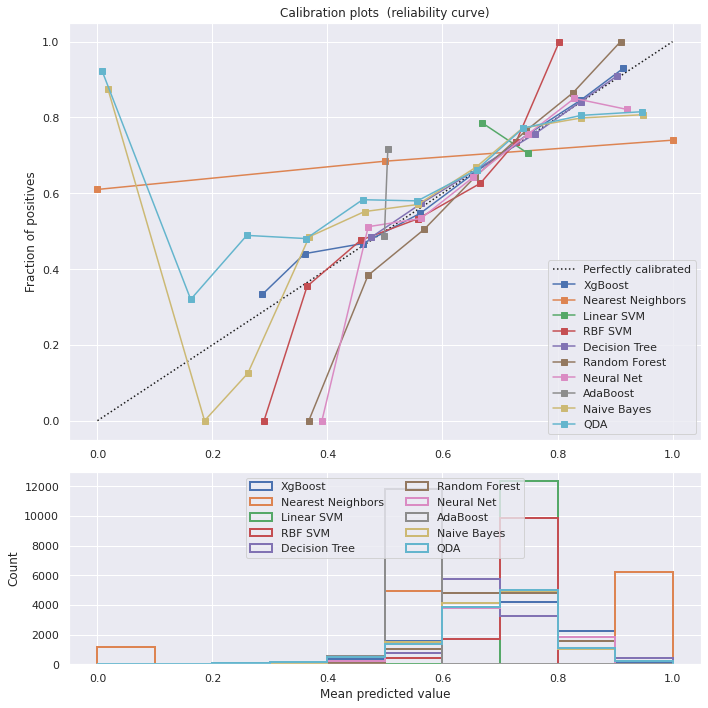

In [ ]:
max_score = 0.0
max_class = ''
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.localtime()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    diff = (time.mktime(time.localtime()) - time.mktime(start_time))
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (diff))
    
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name, histtype="step", lw=2)
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))


ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

As a result, when considering various US states individually we observed that  'Maine' state has got the highest loan approval rate of 90% while New York got the lest loan approval rate of 63%. Also, we found that California has got the highest number of loan applicants (9169) and the loan approval rate is 69% also CA is at top of the list for most debt. Whereas, the state Wyoming has least number of loan applicants (104) that has got 81% of approval rate and is at the bottom of the list for the most debt.

By feature importance we know that loan_amount, annual_income, dti and purpose are the most imp features. But, we tried various combinations of features to train the models using muller loop including Address_state/Rank (here rank is based on most debt specific to state).

We observed that, all the algorithms with all the possibilities of combinations of features we were getting similar accuracy result of 70% in both the cases i.e. including and excluding the location feature. But, with all the important features together we got the highest accuracy by all the algorithms of aporx 70.95%